### Quick-find Problem

In [61]:
class QuickFind:
    def __init__(self, n):
        self.id = [i for i in range(n)]

    def connected(self, p, q):
        return self.id[p] == self.id[q]

    def union(self, p, q):
        pid = self.id[p]
        qid = self.id[q]
        for i in range(len(self.id)):
            if self.id[i] == pid:
                self.id[i] = qid


n = 10
sets = [(4, 3), (3, 8), (6, 5), (9, 4), (2, 1), (8, 9), (5, 0), (7, 2), (6, 1), (1, 0), (6, 7)]

Q = QuickFind(n)
for set in sets:
    if not Q.connected(set[0], set[1]):
        Q.union(set[0], set[1])
        print(set)

        
# Time Complexity - O(n^2)
# Space Complexity - O(n)

(4, 3)
(3, 8)
(6, 5)
(9, 4)
(2, 1)
(5, 0)
(7, 2)
(6, 1)


### Quick-union Problem

In [2]:
class QuickUnion:
    def __init__(self, n):
        self.id = [i for i in range(n)]

    def root(self, i):
        while i != self.id[i]:
            i = self.id[i]
            
        return i
    
    def connected(self, p, q):
        return self.root(p) == self.root(q)
    
    def union(self, p, q):
        self.id[self.root(p)] = self.root(q)
        

n = 10
sets = [(4, 3), (3, 8), (6, 5), (9, 4), (2, 1), (8, 9), (5, 0), (7, 2), (6, 1), (1, 0), (6, 7)]

Q = QuickUnion(n)
for set in sets:
    if not Q.connected(set[0], set[1]):
        Q.union(set[0], set[1])
        print(set)
        
        
# Trees can get tall and find is too expensive.

(4, 3)
(3, 8)
(6, 5)
(9, 4)
(2, 1)
(5, 0)
(7, 2)
(6, 1)


### Weighting

In [3]:
# QuickUnion might put the larger tree lower
# Weighted always chose the better alternative

class WeightedQuickUnion:
    def __init__(self, n):
        self.id = [i for i in range(n)]
        self.size = [1 for i in range(n)]
        
    def root(self, i):
        while i != self.id[i]:
            i = self.id[i]
            
        return i
    
    def connected(self, p, q):
        return self.root(p) == self.root(q)
    
    def union(self, p, q):
        pid = self.root(p)
        qid = self.root(q)
        if self.size[pid] < self.size[qid]:
            self.id[pid] = qid
            self.size[qid] += self.size[pid]
        else:
            self.id[qid] = pid
            self.size[pid] += self.size[qid]
            
            
n = 10
sets = [(4, 3), (3, 8), (6, 5), (9, 4), (2, 1), (8, 9), (5, 0), (7, 2), (6, 1), (1, 0), (6, 7)]

Q = WeightedQuickUnion(n)
for set in sets:
    if not Q.connected(set[0], set[1]):
        Q.union(set[0], set[1])
        print(set)
        

# Depth of any node x is at most lg(n)

(4, 3)
(3, 8)
(6, 5)
(9, 4)
(2, 1)
(5, 0)
(7, 2)
(6, 1)


In [4]:
# Path Compression

class WeightedPCQuickUnion:
    def __init__(self, n):
        self.id = [i for i in range(n)]
        self.size = [1 for i in range(n)]
        
    def root(self, i):
        while i != self.id[i]:
            self.id[i] = self.id[self.id[i]]
            i = self.id[i]
            
        return i
    
    def connected(self, p, q):
        return self.root(p) == self.root(q)
    
    def union(self, p, q):
        pid = self.root(p)
        qid = self.root(q)
        if self.size[pid] < self.size[qid]:
            self.id[pid] = qid
            self.size[qid] += self.size[pid]
        else:
            self.id[qid] = pid
            self.size[pid] += self.size[qid]
            
            
n = 10
sets = [(4, 3), (3, 8), (6, 5), (9, 4), (2, 1), (8, 9), (5, 0), (7, 2), (6, 1), (1, 0), (6, 7)]

Q = WeightedQuickUnion(n)
for set in sets:
    if not Q.connected(set[0], set[1]):
        Q.union(set[0], set[1])
        print(set)
        

# Only one extra line of code keeps tree almost flat.

(4, 3)
(3, 8)
(6, 5)
(9, 4)
(2, 1)
(5, 0)
(7, 2)
(6, 1)


In [7]:
# 3-sum Brute-Force Algorithm -> O(n^3)

# Predict the time complexity for n number of steps -> T(n) = a*n^b
# T(n) - time complexity
# a - constant
# n - number of steps
# b - constant

# Calculate the a by keeping b as double.

# How many array accesses does the following code fragment make as a function of n?

# int sum = 0;
# for (int i = 0; i < n; i++)
#     for (int j = i+1; j < n; j++)
#         for (int k = 1; k < n; k = k*2)
#             if (a[i] + a[j] >= a[k]) sum++;


# Answer - 3/2 n^2 log(n)


# Binary Search -> O(log(n))

### 3-sum Problem

Finding all unique triplets of numbers in an array that sum up to a given target.

In [3]:
# Sort the array -> O(n log(n)) -> Timsort
# For each pair of numbers a[i] and a[j], apply binary search for -(a[i] + a[j])
# Time complexity with binary search -> O(n^2 log(n))

def three_sum(arr):
    arr.sort()
    triplets = set()
    
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            target = -(arr[i] + arr[j])
            left, right = j+1, len(arr)-1
            
            while left < right:
                mid = (left+right)//2
                if arr[mid] == target:
                    triplet = tuple(sorted([arr[i], arr[j], arr[mid]]))
                    triplets.add(triplet)
                    break
                elif arr[left] + arr[right] < mid:
                    left = mid+1
                else:
                    right = mid-1

    return triplets


input = [30, -40, -20, -10, 40, 0, 10, 5]
three_sum(input)

{(-40, 10, 30), (-10, 0, 10)}

### Stack & Queue

In [1]:
class Stack:
    def __init__(self):
        self.items = []
        
    def push(self, item):
        self.items.append(item)
        
    def pop(self):
        return self.items.pop()
    
    def is_empty(self):
        return self.items == []


strings = ["to", "be", "or", "not", "to", "-", "be", "-", "-", "that", "-", "-", "-", "is"]
stack = Stack()
for s in strings:
    if s != "-":
        stack.push(s)
    else:
        if not stack.is_empty():
            print(stack.pop()) 

to
be
not
that
or
be


In [8]:
class Stack:
    def __init__(self):
        self.items = []
        self.max_stack = []
        
    def push(self, item):
        self.items.append(item)
        if len(self.max_stack) == 0 or item >= self.max_stack[-1]:
            self.max_stack.append(item)
        
    def get_max(self):
        data = self.items.pop()
        if data == self.max_stack[-1]:
            self.max_stack.pop()
            
        return self.max_stack[-1]
    
    def is_empty(self):
        return self.items == []


numbers = [10, 4, 9, 13, "-", 5, 6, 7, "-", 12, 15, "-", 4, 10, 14, 3, 2, "-", 1]
stack = Stack()
for n in numbers:
    if n != "-":
        stack.push(n)
    else:
        if not stack.is_empty():
            print("Max value is: ", stack.get_max()) 

Max value is:  10
Max value is:  10
Max value is:  12
Max value is:  14


In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
        
class StackLinkedList:
    def __init__(self):
        self.head = None
        
    def push(self, data):
        node = Node(data)
        node.next = self.head
        self.head = node
        
    def pop(self):
        data = self.head.data
        self.head = self.head.next
        return data
        
    def is_empty(self):
        return self.head == None
        
        
strings = ["to", "be", "or", "not", "to", "-", "be", "-", "-", "that", "-", "-", "-", "is"]
stack = StackLinkedList()
for s in strings:
    if s != "-":
        stack.push(s)
    else:
        if not stack.is_empty():
            print(stack.pop())

to
be
not
that
or
be


In [3]:
class Queue:
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.append(item)
        
    def dequeue(self):
        return self.items.pop(0)
    
    def is_empty(self):
        return self.items == []


strings = ["to", "be", "or", "not", "to", "-", "be", "-", "-", "that", "-", "-", "-", "is"]
queue = Queue()
for s in strings:
    if s != "-":
        queue.enqueue(s)
    else:
        if not queue.is_empty():
            print(queue.dequeue()) 

to
be
or
not
to
be


In [7]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
        
class QueueLinkedList:
    def __init__(self):
        self.front = None
        self.rear = None
        
    def enqueue(self, data):
        node = Node(data)
        if self.rear == None:
            self.front = node
            self.rear = node
        else:
            self.rear.next = node
            self.rear = node
        
    def dequeue(self):
        data = self.front.data
        self.front = self.front.next
        
        if self.front == None:
            self.rear = None
            
        return data
        
    def is_empty(self):
        return self.front == None
        
        
strings = ["to", "be", "or", "not", "to", "-", "be", "-", "-", "that", "-", "-", "-", "is"]
queue = QueueLinkedList()
for s in strings:
    if s != "-":
        queue.enqueue(s)
    else:
        if not queue.is_empty():
            print(queue.dequeue())

to
be
or
not
to
be


In [43]:
class QueueWithTwoStacks:
    def __init__(self):
        self.in_stack = []
        self.out_stack = []
    
    def enqueue(self, value):
        self.in_stack.append(value)
    
    def dequeue(self):
        if not self.out_stack:
            while self.in_stack:
                self.out_stack.append(self.in_stack.pop())
        
        if self.out_stack:
            return self.out_stack.pop()
        else:
            return None
    
    def is_empty(self):
        return not self.in_stack and not self.out_stack


queue = QueueWithTwoStacks()
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print(queue.dequeue())   
print(queue.dequeue())  
queue.enqueue(4) 
print(queue.dequeue())
print(queue.is_empty())
print(queue.in_stack, queue.out_stack)

1
2
3
False
[4] []


### Arithmetic Expression Evaluation
Infix, Prefix, Postfix expressions

In [12]:
def evalRPN(tokens):
    stack = []
    for t in tokens:
        if t in ["+", "-", "*", "/"]:
            b = stack.pop()
            a = stack.pop()
        
        if t == "+":
            stack.append(a+b)
        elif t == "-":
            stack.append(a-b)
        elif t == "*":
            stack.append(a*b)
        elif t == "/":
            stack.append(int(a/b))
        else:
            stack.append(int(t))
            
    return stack


tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
evalRPN(tokens)

[22]

### Password Reset
Use the minimum number of operations (replace chars) to make the permutation as palindrome and if multiple permutations are possible then return the one with alphabetically lowest.

In [45]:
def make_palindrome(s):
    freq = {}
    for i in s:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
            
    odd_chars = [k for k,v in freq.items() if v%2 != 0]

    if len(odd_chars) > 1:
        odd_chars.sort()
        
    for c in range(len(odd_chars)//2):
        freq[odd_chars[c]] += 1
        freq[odd_chars[-c-1]] -= 1
        
    first_s = []
    middle_char = ''

    for char in sorted(freq.keys()):
        if (freq[char] % 2) == 0:
            first_s.extend(char * (freq[char]//2))
        else:
            middle_char = char

    second_s = first_s[::-1]
    final_s = ''.join(first_s) + middle_char + ''.join(second_s)

    return final_s

s = "bbcde"
result = make_palindrome(s)
print(result)

bcdcb


In [39]:
def solution(n):
    n = str(n)
    res = list(map(int, n))
    res = sum(res)
    
    return res

solution(123)

6

In [46]:
def are_they_equal(array_a, array_b):
    dict_a = {}
    dict_b = {}

    if len(array_a) != len(array_b):
        return False

    for i in range(len(array_a)):
        if array_a[i] in dict_a:
            dict_a[array_a[i]] += 1
        else:
            dict_a[array_a[i]] = 1
        
        if array_b[i] in dict_b:
            dict_b[array_b[i]] += 1
        else:
            dict_b[array_b[i]] = 1 

    if dict_a == dict_b:
        return True
    else:
        return False


n_1 = 4
a_1 = [1, 2, 3, 4]
b_1 = [1, 4, 3, 2]
output_1 = are_they_equal(a_1, b_1)
print(output_1)

n_2 = 4
a_2 = [1, 2, 3, 4]
b_2 = [1, 2, 3, 5]  
output_2 = are_they_equal(a_2, b_2)
print(output_2)

True
False


In [51]:
def maxSubArray(nums):
    max_sum = nums[0]
    current_sum = nums[0]
    for i in range(1, len(nums)):
        if current_sum < 0:
            current_sum = 0
        
        current_sum += nums[i]
        max_sum = max(current_sum, max_sum)

    return max_sum


maxSubArray([-2,1,-3,4,-1,2,1,-5,4])

6

In [5]:
def count_subarrays(arr):
    n = len(arr)
    result = [0]*n

    for i in range(n):
        left = 0
        right = n-1
        start = left
        end = right

        while left <= i and right >= i:
            if arr[left] > arr[i]:
                start = left+1
            
            if arr[right] > arr[i]:
                end = right-1
            
            left += 1
            right -= 1
            
        if left < i:
            while left < i:
                if arr[left] > arr[i]:
                    start = left+1
                left += 1
        else:
            while right > i:
                if arr[right] > arr[i]:
                    end = right-1
                right -= 1
        
        result[i] = end-start+1

    return result


test_1 = [3, 4, 1, 6, 2]
expected_1 = [1, 3, 1, 5, 1]
output_1 = count_subarrays(test_1)
print(output_1)

test_2 = [2, 4, 7, 1, 5, 3]
expected_2 = [1, 2, 6, 1, 3, 1]
output_2 = count_subarrays(test_2)
print(output_2)

[1, 3, 1, 5, 1]
[1, 2, 6, 1, 3, 1]


In [1]:
def count_subarrays(arr):
    n = len(arr)
    left = [1]*n
    right  = [1]*n
    
    stack = []
    for i in range(n):
        while stack and arr[stack[-1]] < arr[i]:
            stack.pop()
            
        if stack:
            left[i] = i-stack[-1]
        else:
            left[i] = i+1
            
        stack.append(i)
        
    stack = []
    for i in range(n-1, -1, -1):
        while stack and arr[stack[-1]] < arr[i]:
            stack.pop()
            
        if stack:
            right[i] = stack[-1]-i
        else:
            right[i] = n-i
            
        stack.append(i)
    
    result = [left[i]+right[i]-1 for i in range(n)]
    
    return result


test_1 = [3, 4, 1, 6, 2]
expected_1 = [1, 3, 1, 5, 1]
output_1 = count_subarrays(test_1)
print(output_1)

test_2 = [2, 4, 7, 1, 5, 3]
expected_2 = [1, 2, 6, 1, 3, 1]
output_2 = count_subarrays(test_2)
print(output_2)

[1, 3, 1, 5, 1]
[1, 2, 6, 1, 3, 1]


In [4]:
def findSignatureCounts(arr):
    n = len(arr)
    signatures = [0] * n  
    visited = [False] * n  

    for i in range(n):
        if not visited[i]:
            cycle = []
            current = i
            
            while not visited[current]:
                cycle.append(current)
                visited[current] = True
                current = arr[current] - 1  
            
            cycle_length = len(cycle)
            for student in cycle:
                signatures[student] = cycle_length

    return signatures


arr_1 = [2, 1]
expected_1 = [2, 2]
output_1 = findSignatureCounts(arr_1)
print(output_1)

arr_2 = [1, 2]
expected_2 = [1, 1]
output_2 = findSignatureCounts(arr_2)
print(output_2)

[2, 2]
[1, 1]


In [37]:
import string

def rotationalCipher(input_str, rotation_factor):
    rotational = []
    lower_alpha = string.ascii_lowercase
    upper_alpha = string.ascii_uppercase

    for i in input_str:
        if i.isdigit():
            new = int(i)+rotation_factor
            if new > 9:
                new = new%10
            new = str(new)
            
        elif i.isalpha() and i.islower():
            index = lower_alpha.index(i)
            index = index+rotation_factor
            if index > 25:
                index = index%26
            
            new = lower_alpha[index]
            
        elif i.isalpha() and i.isupper():
            index = upper_alpha.index(i)
            index = index+rotation_factor
            if index > 25:
                index = index%26
            
            new = upper_alpha[index]
        else:
            new = i
            
        rotational.append(new)
        
    rotational = "".join(rotational) 
        
    return rotational


input_1 = "All-convoYs-9-be:Alert1."
rotation_factor_1 = 4
expected_1 = "Epp-gsrzsCw-3-fi:Epivx5."
output_1 = rotationalCipher(input_1, rotation_factor_1)
print(output_1)

input_2 = "abcdZXYzxy-999.@"
rotation_factor_2 = 200
expected_2 = "stuvRPQrpq-999.@"
output_2 = rotationalCipher(input_2, rotation_factor_2)
print(output_2)

Epp-gsrzsCw-3-fi:Epivx5.
stuvRPQrpq-999.@


In [42]:
def matching_pairs(s, t):
    unmatched = []
    count = 0

    for i in range(len(s)):
        if s[i] == t[i]:
            count += 1
        else:
            unmatched.append(i)

    half_swap = False

    if len(unmatched) == 0:
        count -= 2
    elif len(unmatched) == 1:
        count -= 1
    else:
        sub_s = [s[i] for i in unmatched]
        sub_t = [t[i] for i in unmatched]
        for u in unmatched:
            if t[u] in sub_s:
                if half_swap:
                    count -= 1
                
                index = sub_s.index(t[u])
                count += 1
                half_swap = True
                
                if t[index] in sub_t:
                    count += 1
                    break
            
    return count


s_1, t_1 = "abcde", "adcbe"
expected_1 = 5
output_1 = matching_pairs(s_1, t_1)
print(output_1)

s_2, t_2 = "abcd", "abcd"
expected_2 = 2
output_2 = matching_pairs(s_2, t_2)
print(output_2)


5
2


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(42)

x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = 0.6 * x1 + np.random.randn(100) * 0.1 
y = 2 * x1 - 3 * x2 + 1.5 * x3 + np.random.randn(100) * 0.5

data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
})

print(data.head())
X = data[['x1', 'x2', 'x3']]
y = data['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

model1 = LinearRegression()
model1.fit(X[['x1', 'x2']], y)
y_pred1 = model1.predict(X[['x1', 'x2']])


         x1        x2        x3         y
0  0.496714 -1.415371  0.333807  5.325754
1 -0.138264 -0.420645 -0.026880  0.664997
2  0.647689 -0.342715  0.496918  3.442545
3  1.523030 -0.802277  1.019198  7.286874
4 -0.234153 -0.161286 -0.278259 -0.412289


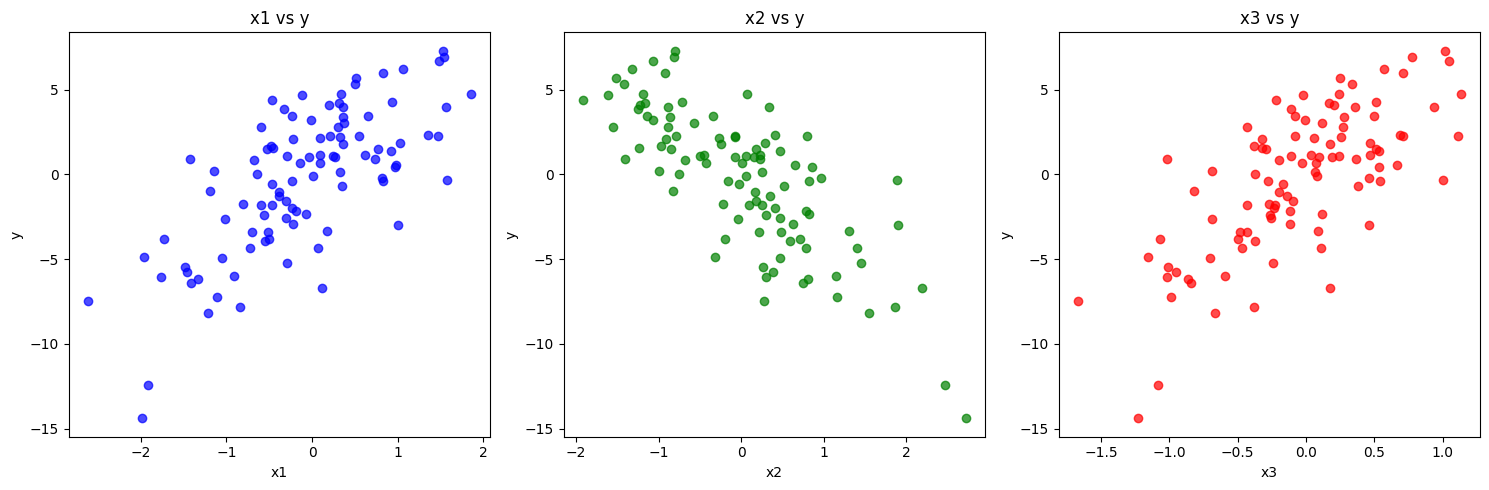

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(x1, y, color='blue', alpha=0.7)
axes[0].set_title('x1 vs y')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('y')

axes[1].scatter(x2, y, color='green', alpha=0.7)
axes[1].set_title('x2 vs y')
axes[1].set_xlabel('x2')
axes[1].set_ylabel('y')

axes[2].scatter(x3, y, color='red', alpha=0.7)
axes[2].set_title('x3 vs y')
axes[2].set_xlabel('x3')
axes[2].set_ylabel('y')

plt.tight_layout()
plt.show()

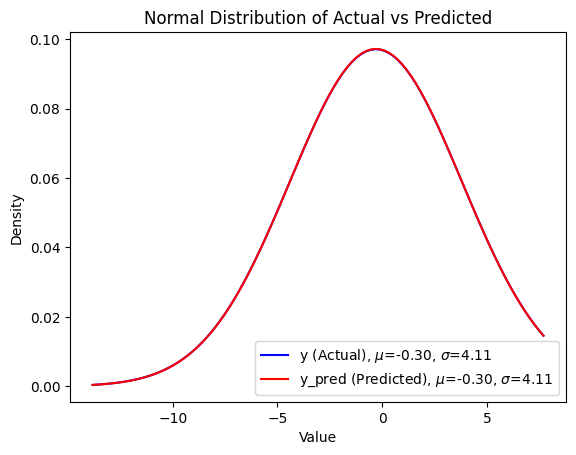

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_y, std_y = norm.fit(y_pred)
mu_y1, std_y1 = norm.fit(y_pred1)

xmin = min(min(y_pred), min(y_pred1))
xmax = max(max(y_pred), max(y_pred1))
x = np.linspace(xmin, xmax, 100)

p_y = norm.pdf(x, mu_y, std_y)
plt.plot(x, p_y, 'b-', label=f'y (Actual), $\mu$={mu_y:.2f}, $\sigma$={std_y:.2f}')

p_pred = norm.pdf(x, mu_y1, std_y1)
plt.plot(x, p_pred, 'r-', label=f'y_pred (Predicted), $\mu$={mu_y1:.2f}, $\sigma$={std_y1:.2f}')

plt.title('Normal Distribution of Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

In [8]:
def min_length_substring(s, t):
    n = len(s)
    res = n+1
    
    sw = {}
    tw = {}
    
    for i in t:
        sw[i] = 0
        if i in tw:
            tw[i] += 1
        else:
            tw[i] = 1
        
    have = 0
    need = len(tw)

    start = 0
    end = 0
    
    for end in range(n):
        if s[end] in sw:
            sw[s[end]] += 1
            if sw[s[end]] == tw[s[end]]:
                have += 1
            
        while have == need:
            res = min(res, end-start+1)
            if s[start] in sw:
                sw[s[start]] -= 1
                if sw[s[start]] < tw[s[start]]:
                    have -= 1
            start += 1

    if res == n+1:
        return -1
    else:
        return res


s1 = "dcbefebce"
t1 = "fd"
expected_1 = 5
output_1 = min_length_substring(s1, t1)
print(output_1)

s2 = "bfbeadbcbcbfeaaeefcddcccbbbfaaafdbebedddf"
t2 = "cbccfafebccdccebdd"
expected_2 = -1
output_2 = min_length_substring(s2, t2)
print(output_2)

s3 = "ADOBECODEBANC"
t3 = "ABC"
expected_3 = 4
output_3 = min_length_substring(s3, t3)
print(output_3)

5
-1
4


In [14]:
def minWindow(s, t) -> str:
    n = len(s)
    min_index = 0
    max_index = 0
    res = n+1

    sw = {}
    tw = {}
    
    for i in t:
        sw[i] = 0
        if i in tw:
            tw[i] += 1
        else:
            tw[i] = 1
        
    have = 0
    need = len(tw)

    start = 0
    end = 0
    
    for end in range(n):
        if s[end] in sw:
            sw[s[end]] += 1
            if sw[s[end]] == tw[s[end]]:
                have += 1
            
        while have == need:
            if res >= end-start+1:
                res = end-start+1
                min_index = start
                max_index = end+1
            
            if s[start] in sw:
                sw[s[start]] -= 1
                if sw[s[start]] < tw[s[start]]:
                    have -= 1
            start += 1

    return s[min_index:max_index]


s3 = "ADOBECODEBANC"
t3 = "ABC"
output_3 = minWindow(s3, t3)
print(output_3)

BANC


In [18]:
def numberOfWays(arr, k):
    nums = {}
    pairs = 0
    
    for i in arr:
        if i in nums:
            nums[i] += 1
        else:
            nums[i] = 1

    for key in nums:
        if k-key in nums:
            if k-key == key:
                val = nums[key]
                pairs += val*(val-1)/2
            else:
                pairs += nums[key]*nums[k-key]/2

    return int(pairs)


k_1 = 6
arr_1 = [1, 2, 3, 4, 3]
expected_1 = 2
output_1 = numberOfWays(arr_1, k_1)
print(output_1)

k_2 = 6
arr_2 = [1, 5, 3, 3, 3]
expected_2 = 4
output_2 = numberOfWays(arr_2, k_2)
print(output_2)

2
4


In [21]:
def bin_search(arr, target):
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    if left >= len(arr):
        return -2
    else:
        return left


def getMilestoneDays(revenues, milestones):
    for i in range(1, len(revenues)):
        revenues[i] += revenues[i-1]
        
    return [1 + bin_search(revenues, m) for m in milestones]


revenues_1 = [100, 200, 300, 400, 500]
milestones_1 = [300, 800, 1000, 1400]
expected_1 = [2, 4, 4, 5]
output_1 = getMilestoneDays(revenues_1, milestones_1)
print(output_1)

revenues_2 = [700, 800, 600, 400, 600, 700]
milestones_2 = [3100, 2200, 800, 2100, 1000] 
expected_2 = [5, 4, 2, 3, 2]
output_2 = getMilestoneDays(revenues_2, milestones_2)
print(output_2)


# Time Complexity - O(n + klogn)
# Space Complexity - O(k)

[2, 4, 4, 5]
[5, 4, 2, 3, 2]


In [22]:
def remove_adjacent_k_duplicates(s, k):
    stack = []
    
    for char in s:
        if stack:
            if stack[-1][0] == char:
                count = stack[-1][1]
                if count == k-1:
                    for i in range(k-1):
                        stack.pop()
                else:
                    stack.append((char, count+1)) 
            else:
                stack.append((char, 1)) 
        else:
            stack.append((char, 1))
            
    rem_chars = [char for char, _ in stack]
    
    return "".join(rem_chars)


s1 = "deeedbbcccbdaa"
k1 = 3
expected_1 = "aa"
output_1 = remove_adjacent_k_duplicates(s1, k1)
print(output_1)

s2 = "pbbcggttciiippooaais"
k2 = 2
expected_2 = "ps"
output_2 = remove_adjacent_k_duplicates(s2, k2)
print(output_2)

aa
ps


### Bubble Sort

In [204]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1):
        swap = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swap = True
                
        if not swap:
            break
                
    return arr


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
output_1 = bubble_sort(elements_1)
print(output_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
output_2 = bubble_sort(elements_2)
print(output_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


In [205]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1):
        swap = False
        for j in range(0, n-i-1):
            if arr[j] < arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swap = True
                
        if not swap:
            break
                
    return arr


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
output_1 = bubble_sort(elements_1)
print(output_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
output_2 = bubble_sort(elements_2)
print(output_2)

[9, 8, 7, 6, 5, 4, 3, 2, 1]
[99, 88, 77, 77, 67, 34, 23, 15, 11, 1]


### Selection Sort

In [ ]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n-1):
        min = i
        for j in range(i+1, n):
            if arr[min] > arr[j]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]
    
    return arr


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
output_1 = selection_sort(elements_1)
print(output_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
output_2 = selection_sort(elements_2)
print(output_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


### Insertion Sort

In [11]:
def insertion_sort(arr):
    n = len(arr)
    swap = 0
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j-1]:
            arr[j], arr[j-1] = arr[j-1], arr[j]
            swap += 1
            j -= 1
    
    print(swap)
    return arr


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
output_1 = insertion_sort(elements_1)
print(output_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
output_2 = insertion_sort(elements_2)
print(output_2)

13
[1, 2, 3, 4, 5, 6, 7, 8, 9]
25
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


### Shell Sort

In [ ]:
def shell_sort(arr):
    n = len(arr)
    gap = n//2
    swap = 0
    while gap > 0:
        for i in range(gap, n):
            j = i
            while j >= gap and arr[j] < arr[j-gap]:
                arr[j], arr[j-gap] = arr[j-gap], arr[j]
                swap += 1
                j -= gap
                
        gap //=2
        
    print(swap)
    return arr


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
output_1 = shell_sort(elements_1)
print(output_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
output_2 = shell_sort(elements_2)
print(output_2)

9
[1, 2, 3, 4, 5, 6, 7, 8, 9]
9
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


### Merge Sort

In [39]:
def merge(arr, low, mid, high):
    temp = []
    left = low
    right = mid+1
    
    while (left <= mid) and (right <= high):
        if arr[left] <= arr[right]:
            temp.append(arr[left])
            left += 1
        else:
            temp.append(arr[right])
            right += 1
            
    while left <= mid:
        temp.append(arr[left])
        left += 1
    
    while right <= high:
        temp.append(arr[right])
        right += 1
        
    for i in range(low, high+1):
        arr[i] = temp[i-low]


def merge_sort(arr, low, high):
    if low>=high:
        return 
    
    mid = (low+high)//2
    merge_sort(arr, low, mid)
    merge_sort(arr, mid+1, high)
    merge(arr, low, mid, high)
    

elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
elements_1_low = 0
elements_1_high = len(elements_1)-1
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
merge_sort(elements_1, elements_1_low, elements_1_high)
print(elements_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
elements_2_low = 0
elements_2_high = len(elements_2)-1
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
merge_sort(elements_2, elements_2_low, elements_2_high)
print(elements_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


### Merge + Insertion Sort
- Use insertion sort for small subarrays.
- Mergesort has too much overhead for tiny subarrays.
- Cutoff to insertion sort for ~ 7 items.

In [ ]:
CUTOFF = 7

def insertion_sort(arr, low, high):
    for i in range(low+1, high+1):
        j = i
        while j > low and arr[j] < arr[j-1]:
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j -= 1


def merge(arr, low, mid, high):
    temp = []
    left = low
    right = mid+1
    
    while (left <= mid) and (right <= high):
        if arr[left] <= arr[right]:
            temp.append(arr[left])
            left += 1
        else:
            temp.append(arr[right])
            right += 1
            
    while left <= mid:
        temp.append(arr[left])
        left += 1
    
    while right <= high:
        temp.append(arr[right])
        right += 1
        
    for i in range(low, high+1):
        arr[i] = temp[i-low]


def merge_sort(arr, low, high):
    if high-low < CUTOFF:
        insertion_sort(arr, low, high)
        return
    
    mid = (low+high)//2
    merge_sort(arr, low, mid)
    merge_sort(arr, mid+1, high)
    if arr[mid] <= arr[mid+1]:
        return
    merge(arr, low, mid, high)
    

elements_1 = [3, 4, 1, 2, 5, 9, 7, 8, 6]
elements_1_low = 0
elements_1_high = len(elements_1)-1
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
merge_sort(elements_1, elements_1_low, elements_1_high)
print(elements_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
elements_2_low = 0
elements_2_high = len(elements_2)-1
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
merge_sort(elements_2, elements_2_low, elements_2_high)
print(elements_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


### Quick Sort

In [ ]:
def partition(arr, low, high):
    pivot = arr[low]
    i = low
    j = high

    while i < j:
        while arr[i] <= pivot and i < high:
            i += 1
        
        while arr[j] > pivot and j > low:
            j -= 1
            
        if i < j:
            arr[i], arr[j] = arr[j], arr[i]
            
    arr[low], arr[j] = arr[j], arr[low]
    
    return j
        

def quick_sort(arr, low, high):
    if high <= low:
        return
    
    p = partition(arr, low, high)
    quick_sort(arr, low, p-1)
    quick_sort(arr, p+1, high)
    

elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
elements_1_low = 0
elements_1_high = len(elements_1)-1
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
quick_sort(elements_1, elements_1_low, elements_1_high)
print(elements_1)

elements_2 = [5, 5, 5, 5, 5]
elements_2_low = 0
elements_2_high = len(elements_2)-1
expected_2 = [5, 5, 5, 5, 5]
quick_sort(elements_2, elements_2_low, elements_2_high)
print(elements_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 5, 5, 5, 5]


### Count Sort

In [ ]:
def count_sort(arr):
    if len(arr) == 0:
        return
    
    max_val = max(arr)
    count = [0]*(max_val+1)
    
    for i in arr:
        count[i] += 1
    
    j = 0    
    for i in range(len(count)):
        while count[i] > 0:
            arr[j] = i
            count[i] -= 1
            j += 1
    

elements_1 = [2, 3, 2, 5, 2, 4, 1, 6, 5, 7]
expected_1 = [1, 2, 2, 2, 3, 4, 5, 5, 6, 7]
count_sort(elements_1)
print(elements_1)

elements_2 = [4, 8, 12, 5, 8, 12, 7, 8, 12]
expected_2 = [4, 5, 7, 8, 8, 8, 12, 12, 12]
count_sort(elements_2)
print(elements_2)

[1, 2, 2, 2, 3, 4, 5, 5, 6, 7]
[1, 4, 5, 7, 8, 8, 8, 12, 12]


In [2]:
def count_sort(arr):
    if len(arr) == 0:
        return
    
    min_val = min(arr)
    max_val = max(arr)
    count = [0]*(max_val-min_val+1)
    
    for i in arr:
        count[i-min_val] += 1
    
    j = 0    
    for i in range(len(count)):
        while count[i] > 0:
            arr[j] = i+min_val
            count[i] -= 1
            j += 1
    

elements_1 = [-2, 3, -2, -5, 2, 4, 1, -6, 5, 7]
expected_1 = [-6, -5, -2, -2, 1, 2, 3, 4, 5, 7]
count_sort(elements_1)
print(elements_1)

[-6, -5, -2, -2, 1, 2, 3, 4, 5, 7]


In [4]:
def count_sort(arr):
    if len(arr) == 0:
        return
    
    min_val = min(arr)
    max_val = max(arr)
    count = [0]*(max_val-min_val+1)
    output = [0]*len(arr)
    
    for i in arr:
        count[i-min_val] += 1
    
    for i in range(1, len(count)):
        count[i] += count[i-1]
    
    for i in range(len(arr)-1, -1, -1):
        output[count[arr[i]-min_val]-1] = arr[i]
        count[arr[i]-min_val] -= 1
        
    return output


elements_1 = [-2, 3, -2, -5, 2, 4, 1, -6, 5, 7]
expected_1 = [-6, -5, -2, -2, 1, 2, 3, 4, 5, 7]
result = count_sort(elements_1)
print(result)

[-6, -5, -2, -2, 1, 2, 3, 4, 5, 7]


### Radix Sort

In [128]:
# In any number, /10 will remove last digit and %10 will give last digit

n = 5789
while n > 0:
    print(n//10, n%10)
    n = n//10

578 9
57 8
5 7
0 5


In [18]:
def count_sort(arr, exp):
    count = [0]*9
    output = [0]*len(arr)
    
    for i in range(len(arr)):
        num = (arr[i]//exp)%10
        count[num] += 1
        
    for i in range(1, len(count)):
        count[i] += count[i-1]
        
    for i in range(len(arr)-1, -1, -1):
        num = (arr[i]//exp)%10
        output[count[num]-1] = arr[i]
        count[num] -= 1
        
    for i in range(len(arr)):
        arr[i] = output[i]

def radix_sort(arr):
    if len(arr) == 0:
        return
    
    max_val = max(arr)
    
    exp = 1
    while max_val//exp > 0:
        count_sort(arr, exp)
        exp *= 10
    

elements_1 = [2, 3, 2, 5, 2, 4, 1, 6, 5, 7]
expected_1 = [1, 2, 2, 2, 3, 4, 5, 5, 6, 7]
radix_sort(elements_1)
print(elements_1)

elements_2 = [4, 8, 12, 5, 8, 12, 7, 8, 12]
expected_2 = [4, 5, 7, 8, 8, 8, 12, 12, 12]
radix_sort(elements_2)
print(elements_2)

[1, 2, 2, 2, 3, 4, 5, 5, 6, 7]
[4, 5, 7, 8, 8, 8, 12, 12, 12]


In [2]:
def findMeetingRooms(meeting_rooms):
    start = []
    end = []
    
    for i in range(len(meeting_rooms)):
        start.append(meeting_rooms[i][0])
        end.append(meeting_rooms[i][1])
        
    start.sort()
    end.sort()
    
    i = 0
    j = 0
    count = 0
    max_rooms = 0
    while i < len(meeting_rooms):
        if start[i] < end[j]:
            count += 1
            i += 1
        else:
            count -= 1
            j += 1
            
        max_rooms = max(max_rooms, count)
    
    return max_rooms


meeting_rooms_1 = [[0, 30], [5, 10], [15, 20]]
expected_1 = 2
output_1 = findMeetingRooms(meeting_rooms_1)
print(output_1)

meeting_rooms_2 = [(65,424),(351,507),(314,807),(387,722),(19,797),(259,722),(165,221),(136,897)]
expected_2 = 7
output_2 = findMeetingRooms(meeting_rooms_2)
print(output_2)

2
7


In [7]:
def longestConsecutive(nums):
    nums_set = set(nums)
    max_count = 0

    for n in nums_set:
        if n-1 not in nums_set:
            count = 1
            while (n+count) in nums_set:
                count += 1
            max_count = max(count, max_count)

    return max_count


longestConsecutive_1 = [100, 4, 200, 1, 3, 2]
expected_1 = 4
output_1 = longestConsecutive(longestConsecutive_1)
print(output_1)

4


In [12]:
import collections

def maxSlidingWindow(nums, k):
    output = []
    q = collections.deque()
    l = r = 0

    while r < len(nums):
        while q and nums[q[-1]] < nums[r]:
            q.pop()
        q.append(r)

        if l > q[0]:
            q.popleft()

        if (r-l) == k-1:
            output.append(nums[q[0]])
            l+=1
        r+=1

    return output


numbers_1 = [1, 3, -1, -3, 5, 3, 6, 7]
k_1 = 3
expected_1 = [3, 3, 5, 5, 6, 7]
output_1 = maxSlidingWindow(numbers_1, k_1)
print(output_1)

numbers_2 = [1]
k_2 = 1
expected_2 = [1]
output_2 = maxSlidingWindow(numbers_2, k_2)
print(output_2)

[3, 3, 5, 5, 6, 7]
[1]


In [51]:
def fibonacci(n):
    a = 0
    b = 1

    if n==0 or n==1:
        return n

    for i in range(2, n):
        c = a+b
        a = b
        b = c
        
    return b


n = 4
print(fibonacci(n))

2


In [54]:
def fibonacci_recursion(n):
    if n==0 or n==1:
        return n
    return fibonacci_recursion(n-1) + fibonacci_recursion(n-2)


n = 5
print(fibonacci_recursion(n-1))

3


In [60]:
def check_colorful(num):
    products = set()
    num = str(num)
    n = len(num)
    
    for i in range(n):
        prod = 1
        for j in range(i, n):
            prod *= int(num[j])
            if prod in products:
                return False
            products.add(prod)
                
    return True
        

number = 3245
output = check_colorful(number)
print(output)

True


In [37]:
from collections import deque

def catchMaxTheifs(arr, k):
    n = len(arr)
    police, theif = [], []
    catched = 0
    
    for i in range(n):
        if arr[i] == "P":
            police.append(i)
        else:
            theif.append(i)
            
    for p in police:
        for t in theif:
            if abs(t-p) <= k:
                theif.remove(t)
                catched += 1
                break
            
    return catched


def catchMaxTheifsOpt(arr, k):
    n = len(arr)
    police, theif = [], []
    catched = 0
    
    for i in range(n):
        if arr[i] == "P":
            police.append(i)
        else:
            theif.append(i)
            
    p = 0
    t = 0
    while p < len(police) and t < len(theif):
        if abs(police[p] - theif[t]) <= k:
            p += 1
            t += 1
            catched += 1
        elif p < t:
            p += 1
        else:
            t += 1
            
    return catched


def catchMaxTheifsOpt2(arr, k):
    n = len(arr)
    police, theif = deque(), deque()
    catched = 0
    
    for i in range(n):
        if arr[i] == "P":
            police.append(i)
        else:
            theif.append(i)
            
        if police and police[0] < i-k:
            police.popleft()
            
        if theif and theif[0] < i-k:
            theif.popleft()
            
        if police and theif and abs(police[0]-theif[0]) <= k:
            police.popleft()
            theif.popleft()
            catched += 1
            
    return catched


arr1 = ['P', 'T', 'T', 'T', 'P', 'P', 'P', 'P', 'T', 'T', 'P', 'P', 'P', 'T']
k_1 = 2
expected_1 = 2
output_1 = catchMaxTheifsOpt2(arr1, k_1)
print(output_1)

arr2 = ['T', 'T', 'P', 'P', 'T', 'P']
k_2 = 2
expected_2 = 3
output_2 = catchMaxTheifsOpt2(arr2, k_2)
print(output_2)

6
3


### Shuffling - Knuth Shuffle
In iteration i, pick r between 0 and i uniformly at random. Swap A[i] with A[r].

In [40]:
import random

arr = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(arr)):
    r = int(random.uniform(0, i))
    arr[i], arr[r] = arr[r], arr[i]

print(arr)

[6, 10, 3, 2, 8, 5, 4, 7, 9]


### Intersection of two sets

In [43]:
a = [[1, 2], [3, 4], [5, 6], [7, 8]]
b = [[1, 2], [2, 4], [3, 6], [5, 8]]

count = 0
a = set(map(tuple, a))
b = set(map(tuple, b))

for i in a:
    if i in b:
        count += 1
        
print(count)

{(1, 2), (7, 8), (3, 4), (5, 6)} {(2, 4), (1, 2), (5, 8), (3, 6)}
1


### Quickselect - Kth largest element

In [20]:
def partition(arr, low, high):
    pivot = arr[low]
    i = low
    j = high

    while i < j:
        while arr[i] >= pivot and i < high:
            i += 1
        
        while arr[j] < pivot and j > low:
            j -= 1
            
        if i < j:
            arr[i], arr[j] = arr[j], arr[i]
            
    arr[low], arr[j] = arr[j], arr[low]
    
    return j


arr = [3, 2, 4, 9, 5, 6, 1, 8, 7]
k = 4

low = 0
high = len(arr)-1

while low < high:
    p = partition(arr, low, high)
    if p < k:
        low = p+1
    elif p > k:
        high = p-1
    else:
        break
        
print(arr[k])

5


### Recursion

In [57]:
def fun(n):
    if n == 0:
        return
    print(n)
    fun(n-1)

def funrev(n):
    if n == 0:
        return
    funrev(n-1)
    print(n)


fun(5)
print("---")
funrev(5)

5
4
3
2
1
---
1
2
3
4
5


In [62]:
def fact(n):
    if n <= 1:
        return 1
    
    return n * fact(n-1)


fact(5)

120

In [108]:
def sumOfDigits(n):
    if n == 0:
        return 0
    
    return n%10 + sumOfDigits(n//10)

def prodOfDigits(n):
    if n%10==n:
        return n
    
    return n%10 * prodOfDigits(n//10)

def reverseDigits1(n):
    if n%10==n:
        return str(n)
    
    return str(n%10) + reverseDigits1(n//10)

def reverseDigits2(n, res2=0):
    if n==0:
        return res2
    
    res2 = res2*10 + n%10
    return reverseDigits2(n//10, res2)


print(sumOfDigits(1342))
print(prodOfDigits(1342))

res1 = reverseDigits1(1824)
print(int(res1))

res2 = reverseDigits2(1824)
print(res2)

10
24
4281
4281


In [113]:
def palindrome(n, start, end):
    if start >= end:
        return True

    if n[start]!=n[end]:
        return False
    
    return palindrome(n, start+1, end-1)


n = "123221"
palindrome(n, 0, len(n)-1)

False

In [186]:
def linear_search(arr, target, index, pos):
    if index==len(arr):
        return
    
    if arr[index] == target:
        pos.append(index+1)
        
    linear_search(arr, target, index+1, pos)


arr = [2, 5, 1, 9, 7, 2, 5, 8, 6, 5]
target = 5

positions = []
linear_search(arr, target, 0, positions)
print(positions)

[2, 7, 10]


In [ ]:
def linear_search(arr, target, index=0):
    if index==len(arr):
        return []

    pos = []
    if arr[index] == target:
        pos = [index+1]
        
    pos.extend(linear_search(arr, target, index+1))
        
    return pos


arr = [2, 5, 1, 9, 7, 2, 5, 8, 6, 5]
target = 5

postions = linear_search(arr, target)
print(postions)

[2, 7, 10]


In [50]:
def bin_search(arr, low, high, target):
    if low > high:
        return -1
    
    mid = (low+high)//2
    if arr[mid] == target:
        return mid+1
    elif arr[mid] > target:
        return bin_search(arr, low, mid-1, target)
    else:
        return bin_search(arr, mid+1, high, target)


arr = [1, 11, 15, 23, 34, 67, 72, 74, 78, 89]
low = 0
high = len(arr) - 1
target = 1

val = bin_search(arr, low, high, target)
print(val)

1


In [133]:
n = 5

for i in range(n, 0, -1):
    for j in range(i):
        print("*", end="")
    print()

*****
****
***
**
*


In [181]:
def pattern1(r, c):
    if r < 0:
        return
    
    if c <= r:
        print("*", end="")
        pattern1(r, c+1)
    else:
        print()
        pattern1(r-1, 0)
        
def pattern2(n, r, c):
    if r < 0:
        return
    
    if c < (n-r-1):
        print(" ", end="")
        pattern2(n, r, c+1)
    elif c < n:
        print("*", end="")
        pattern2(n, r, c+1)
    else:
        print()
        pattern2(n, r-1, 0)
        
        
pattern1(4, 0)
pattern2(5, 4, 0)

*****
****
***
**
*
*****
 ****
  ***
   **
    *


In [182]:
n = 7

for i in range(n):
    for j in range(n-i-1):
        print(" ", end="")
    for j in range(2*i+1):
        print("*", end="")
    print()
    
for i in range(n):
    for j in range(i):
        print(" ", end="")
    for j in range(2*(n-i)-1):
        print("*", end="")
    print()

      *
     ***
    *****
   *******
  *********
 ***********
*************
*************
 ***********
  *********
   *******
    *****
     ***
      *


In [183]:
def pattern3(n, r, c):
    if r == n:
        return
    
    if c < (n-r-1):
        print(" ", end="")
        pattern3(n, r, c+1)
    elif c < (n+r):
        print("*", end="")
        pattern3(n, r, c+1)
    else:
        print()
        pattern3(n, r+1, 0)
        
def pattern4(n, r, c):
    if r < 0:
        return
    
    if c < (n-r-1):
        print(" ", end="")
        pattern4(n, r, c+1)
    elif c < (n+r):
        print("*", end="")
        pattern4(n, r, c+1)
    else:
        print()
        pattern4(n, r-1, 0)
        
        
pattern3(7, 0, 0)
pattern4(7, 6, 0)

      *
     ***
    *****
   *******
  *********
 ***********
*************
*************
 ***********
  *********
   *******
    *****
     ***
      *


In [207]:
def bubble_sort(arr, i, j):
    if i == 0:
        return
    
    if j < i:
        if arr[j] > arr[j+1]:
            arr[j], arr[j+1] = arr[j+1], arr[j]
        bubble_sort(arr, i, j+1)
    else:
        bubble_sort(arr, i-1, 0)


elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
bubble_sort(elements_1, len(elements_1)-1, 0)
print(elements_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
bubble_sort(elements_2, len(elements_2)-1, 0)
print(elements_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


In [216]:
def selection_sort(arr, i, j, min):
    if i == len(arr)-1:
        return
    
    if j < len(arr):
        if arr[min] > arr[j]:
            min = j
        selection_sort(arr, i, j+1, min)
    else:
        arr[i], arr[min] = arr[min], arr[i]
        selection_sort(arr, i+1, i+2, i+1)
        

elements_1 = [3, 4, 1, 9, 7, 2, 5, 8, 6]
expected_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
selection_sort(elements_1, 0, 1, 0)
print(elements_1)

elements_2 = [11, 99, 15, 77, 88, 23, 77, 67, 1, 34]
expected_2 = [1, 11, 15, 23, 34, 67, 77, 77, 88, 99]
selection_sort(elements_2, 0, 1, 0)
print(elements_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 11, 15, 23, 34, 67, 77, 77, 88, 99]


In [232]:
def remove_char(s, i, c, ans=""):
    if i == len(s):
        return ans
    
    if s[i] != c:
        ans += s[i]
        
    return remove_char(s, i+1, c, ans)

s = "baccad"
remove_char(s, 0, "a")

'bccd'

In [240]:
def remove_str(s, i, c, ans=""):
    if i == len(s):
        return ans
    
    if s[i:].startswith(c):
        return remove_str(s, i+5, c, ans)
    else:
        ans += s[i]
        return remove_str(s, i+1, c, ans)
        

s = "baccappled"
remove_str(s, 0, "apple")

'baccd'

In [249]:
s = "hello"
for i in s:
    print(ord(i), end=" ")
    
print()

for i in s:
    print(chr(ord(i)+1), end="")

104 101 108 108 111 
ifmmp

In [251]:
def subseq(p, up):
    if up == "":
        print(p)
        return
    
    subseq(p+up[0], up[1:])
    subseq(p, up[1:])
    
    
subseq("", "abc")

abc
ab
ac
a
bc
b
c



In [ ]:
def subseq(p, up, ans):
    if up == "":
        ans.append(p)
        return
    
    subseq(p+up[0], up[1:], ans)
    subseq(p, up[1:], ans)
    
    
ans = []    
subseq("", "abc", ans)
print(ans)

['abc', 'ab', 'ac', 'a', 'bc', 'b', 'c', '']


In [277]:
def subseq(p, up):
    if up == "":
        return [p]

    left = subseq(p+up[0], up[1:])
    right = subseq(p, up[1:])
    
    return left+right
    

subseq("", "abc")

['abc', 'ab', 'ac', 'a', 'bc', 'b', 'c', '']

In [308]:
def subseq(p, up):
    if up == "":
        return [p]

    left = subseq(p+up[0], up[1:])
    right = subseq(p, up[1:])
    ascii = subseq(p+str(ord(up[0])), up[1:])
    
    return left+right+ascii
    

len(subseq("", "abc"))

27

### Subset problem using recursion

In [323]:
def subset(p, up, ans):
    if up == []:
        ans.append(p)
        return
    
    subset(p+[up[0]], up[1:], ans)
    subset(p, up[1:], ans)
    
    
ans = []    
subset([], [1, 2, 3], ans)
print(ans)

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]


### Subset problem using iteration

In [9]:
arr = [1, 2, 3]

ans = [[]]
for i in range(len(arr)):
    temp = ans.copy()
    for j in range(len(ans)):
        temp[j] = temp[j]+[arr[i]]
    ans.extend(temp)
    
print(ans)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]


In [15]:
arr = [1, 2, 3]

ans = [[]]
for i in range(len(arr)):
    n = len(ans)
    for j in range(n):
        ans.append(ans[j]+[arr[i]])
    
print(ans)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]


Time Complexity Recursion: O(2^n)

Time Complexity Iteration: O(n*2^n)

Space Complexity: O(n*2^n)

### Duplicate elements in a set

In [87]:
arr = [1, 2, 2, 2, 3, 3]

ans = [[]]
for i in range(len(arr)):
    start = 0
    if i > 0 and arr[i]==arr[i-1]:
        start = end
    end = len(ans)
    
    for j in range(start, end):
        ans.append(ans[j]+[arr[i]])
    
print(len(ans))
print(ans)

24
[[], [1], [2], [1, 2], [2, 2], [1, 2, 2], [2, 2, 2], [1, 2, 2, 2], [3], [1, 3], [2, 3], [1, 2, 3], [2, 2, 3], [1, 2, 2, 3], [2, 2, 2, 3], [1, 2, 2, 2, 3], [3, 3], [1, 3, 3], [2, 3, 3], [1, 2, 3, 3], [2, 2, 3, 3], [1, 2, 2, 3, 3], [2, 2, 2, 3, 3], [1, 2, 2, 2, 3, 3]]


In [88]:
def subset(p, up, i, ans):
    if i == len(up):
        ans.append(p)
        return
    
    subset(p+[up[i]], up, i+1, ans)
    while i+1 < len(up) and up[i]==up[i+1]:
        i+=1
    subset(p, up, i+1, ans)
    
    
ans = []
subset([], [1, 2, 2, 2, 3, 3], 0, ans)
print(len(ans))
print(ans)

24
[[1, 2, 2, 2, 3, 3], [1, 2, 2, 2, 3], [1, 2, 2, 2], [1, 2, 2, 3, 3], [1, 2, 2, 3], [1, 2, 2], [1, 2, 3, 3], [1, 2, 3], [1, 2], [1, 3, 3], [1, 3], [1], [2, 2, 2, 3, 3], [2, 2, 2, 3], [2, 2, 2], [2, 2, 3, 3], [2, 2, 3], [2, 2], [2, 3, 3], [2, 3], [2], [3, 3], [3], []]


### Permutation problem

In [2]:
def subseq(p, up, ans):
    if up == "":
        ans.append(p)
        return
    
    for i in range(len(p)+1):
        new_p = p[:i]+up[0]+p[i:]
        subseq(new_p, up[1:], ans)
    
    
ans = []    
subseq("", "abc", ans)
print(ans)

['cba', 'bca', 'bac', 'cab', 'acb', 'abc']


In [6]:
def subset(p, up, ui, ans):
    if ui == len(up):
        ans.append(p)
        return
    
    for i in range(len(p)+1):
        new_p = p[:i]+[up[ui]]+p[i:]
        subset(new_p, up, ui+1, ans)
    
    
ans = []
subset([], [1, 2, 3], 0, ans)
print(ans)

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]


In [8]:
def subset(p, up, ui):
    if ui == len(up):
        return [p]
    
    ans = []
    for i in range(len(p)+1):
        new_p = p[:i]+[up[ui]]+p[i:]
        ans.extend(subset(new_p, up, ui+1))
        
    return ans
    
    
subset([], [1, 2, 3], 0)

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

In [94]:
arr = [1, 2, 3]

ans = [[]]

for i in range(len(arr)):
    temp = []
    for j in range(len(ans)):
        for k in range(len(ans[j])+1):
            new = ans[j][:k]+[arr[i]]+ans[j][k:]
            temp.append(new)
    ans = temp
    
print(ans)

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]


Time Complexity Recursion: O(n*n!)

Time Complexity Iteration: O(n*n!)

Space Complexity: O(n*n!)

In [ ]:
maps = {"2": "abc", 
    "3": "def",
    "4": "ghi",
    "5": "jkl",
    "6": "mno",
    "7": "pqrs",
    "8": "tuv",
    "9": "wxyz"}

ans = [""]
nums = "23"
patterns = [maps[e] for e in nums]

for letter in patterns:
    temp = []
    for j in ans:
        for k in letter:
            temp.append(j+k)
    ans = temp
    
print(ans)

# Time complexity - O(m^n)
# Space complexity - O(n*m^n)
# m - number of letters (average)
# n - number of digits

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


In [33]:
maps = {"2": "abc", 
    "3": "def",
    "4": "ghi",
    "5": "jkl",
    "6": "mno",
    "7": "pqrs",
    "8": "tuv",
    "9": "wxyz"}

def comb(p, up, ui, ans):
    if ui == len(up):
        ans.append(p)
        return
    
    for i in up[ui]:
        comb(p+i, up, ui+1, ans)
    
    
patterns = [maps[e] for e in nums]
ans = []
comb("", patterns, 0, ans)
print(ans)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


In [ ]:
def dice_roll(p, up, ui, target):
    if ui == len(up):
        if sum(p) == target:
            return 1
        else:
            return 0
        
    count = 0
    for i in up[ui]:
        count = count + dice_roll(p+[i], up, ui+1, target)
        
    return count
    
n, k, target = 2, 6, 7
options = [list(range(1, k+1)) for i in range(n)]
count = dice_roll([], options, 0, target)
print(count)

6


In [55]:
def dice_roll(p, up, dice_n, ans):
    if up == 0:
        ans.append(p)
        return
    
    i = 1
    while i <= dice_n and i <= up:
        dice_roll(p+[i], up-i, dice_n, ans)
        i+=1
    

target = 4
ans = []
dice_roll([], target, 6, ans)
print(ans)

[[1, 1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 3], [2, 1, 1], [2, 2], [3, 1], [4]]


In [53]:
def dice_roll(p, up, n, k, ans):
    if up == 0 and len(p) == n:
        ans.append(p)
        return
    
    i = 1
    while i <= k and i <= up and len(p) < n:
        dice_roll(p+[i], up-i, n, k, ans)
        i+=1
    

target = 9
n = 2
k = 6
ans = []
dice_roll([], target, n, k, ans)
print(ans)

[[3, 6], [4, 5], [5, 4], [6, 3]]


### Backtracking

In [58]:
def maze(r, c):
    if r == 1 or c == 1:
        return 1
    
    count = 0
    count += maze(r-1, c)
    count += maze(r, c-1)
    
    return count


count = maze(4, 4)
print(count)

20


In [82]:
def maze(p, r, c, ans):
    if r == 1 and c == 1:
        ans.append(p)
        return
    
    if r > 1:
        maze(p+"D", r-1, c, ans)
    if c > 1:
        maze(p+"R", r, c-1, ans)


ans = []
maze("", 3, 3, ans)
print(ans)

# Time complexity - O(2^(r+c))
# Space complexity - O(2^(r+c))

['DDRR', 'DRDR', 'DRRD', 'RDDR', 'RDRD', 'RRDD']


In [132]:
def maze_diag(p, r, c, ans):
    if r == 1 and c == 1:
        ans.append(p)
        return
    
    if r > 1 and c > 1:
        maze_diag(p+"D", r-1, c-1, ans)
    if r > 1:
        maze_diag(p+"V", r-1, c, ans)
    if c > 1:
        maze_diag(p+"H", r, c-1, ans)


ans = []
maze_diag("", 3, 3, ans)
print(len(ans))
print(ans)

# Time complexity - O(3^(r+c))
# Space complexity - O(3^(r+c))

13
['DD', 'DVH', 'DHV', 'VDH', 'VVHH', 'VHD', 'VHVH', 'VHHV', 'HDV', 'HVD', 'HVVH', 'HVHV', 'HHVV']


In [90]:
def maze_obs(p, r, c, maze, ans):
    if r == len(maze[0])-1 and c == len(maze)-1:
        ans.append(p)
        return
    
    if maze[r][c]:
        return
    
    if r < len(maze[0])-1:
        maze_obs(p+"D", r+1, c, maze, ans)
    if c < len(maze)-1:
        maze_obs(p+"R", r, c+1, maze, ans)


maze = [[0, 0, 1], [0, 0, 0], [0, 0, 0]]
ans = []
maze_obs("", 0, 0, maze, ans)
print(ans)

['DDRR', 'DRDR', 'DRRD', 'RDDR', 'RDRD']


In [5]:
def maze_back(p, r, c, maze):
    if r == len(maze[0])-1 and c == len(maze)-1:
        return [p]
    
    if not maze[r][c]:
        return []
    
    ans = []
    maze[r][c] = False # Set state as visited before another recursive call
    
    if r < len(maze[0])-1:
        path = maze_back(p+"D", r+1, c, maze)
        ans += path
        
    if c < len(maze)-1:
        path = maze_back(p+"R", r, c+1, maze)
        ans += path
        
    if r > 0:
        path = maze_back(p+"U", r-1, c, maze)
        ans += path
        
    if c > 0:
        path = maze_back(p+"L", r, c-1, maze)
        ans += path
        
    maze[r][c] = True # Set as original before returning to previous call
    
    return ans


maze = [[True, True, True], [True, True, True], [True, True, True]]
ans = maze_back("", 0, 0, maze)
print(ans)

['DDRR', 'DDRURD', 'DDRUURDD', 'DRDR', 'DRRD', 'DRURDD', 'RDDR', 'RDRD', 'RDLDRR', 'RRDD', 'RRDLDR', 'RRDLLDRR']


In [4]:
def maze_back(p, r, c, maze, ans):
    if r == len(maze[0])-1 and c == len(maze)-1:
        ans.append(p)
        return
    
    if not maze[r][c]:
        return
    
    maze[r][c] = False # Set state as visited before another recursive call
    
    if r < len(maze[0])-1:
        maze_back(p+"D", r+1, c, maze, ans)
    if c < len(maze)-1:
        maze_back(p+"R", r, c+1, maze, ans)
    if r > 0:
        maze_back(p+"U", r-1, c, maze, ans)
    if c > 0:
        maze_back(p+"L", r, c-1, maze, ans)
        
    maze[r][c] = True # Set as original before returning to previous call


maze = [[True, True, True], [True, True, True], [True, True, True]]
ans = []
maze_back("", 0, 0, maze, ans)
print(ans)

['DDRR', 'DDRURD', 'DDRUURDD', 'DRDR', 'DRRD', 'DRURDD', 'RDDR', 'RDRD', 'RDLDRR', 'RRDD', 'RRDLDR', 'RRDLLDRR']


In [ ]:
def maze_back(p, r, c, maze, path, step, ans):
    if r == len(maze[0])-1 and c == len(maze)-1:
        path[r][c] = step
        for i in range(len(path)):
            print(path[i])
        print()
        ans.append(p)
        return
    
    if not maze[r][c]:
        return
    
    maze[r][c] = False # Set state as visited before another recursive call
    path[r][c] = step
    
    if r < len(maze[0])-1:
        maze_back(p+"D", r+1, c, maze, path, step+1, ans)
    if c < len(maze)-1:
        maze_back(p+"R", r, c+1, maze, path, step+1, ans)
    if r > 0:
        maze_back(p+"U", r-1, c, maze, path, step+1, ans)
    if c > 0:
        maze_back(p+"L", r, c-1, maze, path, step+1, ans)
        
    maze[r][c] = True # Set as original before returning to previous call
    path[r][c] = 0


maze = [[True, True, True], [True, True, True], [True, True, True]]
ans = []
path = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
step = 1
maze_back("", 0, 0, maze, path, step, ans)
print(ans)

[1, 0, 0]
[2, 0, 0]
[3, 4, 5]

[1, 0, 0]
[2, 5, 6]
[3, 4, 7]

[1, 6, 7]
[2, 5, 8]
[3, 4, 9]

[1, 0, 0]
[2, 3, 0]
[0, 4, 5]

[1, 0, 0]
[2, 3, 4]
[0, 0, 5]

[1, 4, 5]
[2, 3, 6]
[0, 0, 7]

[1, 2, 0]
[0, 3, 0]
[0, 4, 5]

[1, 2, 0]
[0, 3, 4]
[0, 0, 5]

[1, 2, 0]
[4, 3, 0]
[5, 6, 7]

[1, 2, 3]
[0, 0, 4]
[0, 0, 5]

[1, 2, 3]
[0, 5, 4]
[0, 6, 7]

[1, 2, 3]
[6, 5, 4]
[7, 8, 9]

['DDRR', 'DDRURD', 'DDRUURDD', 'DRDR', 'DRRD', 'DRURDD', 'RDDR', 'RDRD', 'RDLDRR', 'RRDD', 'RRDLDR', 'RRDLLDRR']


In [2]:
def NQueens(r, board, ans):
    if r == len(board):
        res = ["".join(row) for row in board]
        ans.append(res)
        return 1
    
    count = 0
    for c in range(0, len(board)):
        if is_safe(r, c, board):
            board[r][c] = "Q"
            count += NQueens(r+1, board, ans)
            board[r][c] = "."
        
    return count

def is_safe(r, c, board):
    # check top 
    for i in range(0, r):
        if board[i][c] == "Q":
            return False
        
    # check left diagonal
    max_left = min(r, c)
    for i in range(1, max_left+1):
        if board[r-i][c-i] == "Q":
            return False
        
    # check right diagonal
    max_right = min(r, len(board)-c-1)   
    for i in range(1, max_right+1):
        if board[r-i][c+i] == "Q":
            return False
        
    return True


ans = []
n = 4
board = [["."] * n for _ in range(n)]
count = NQueens(0, board, ans)
print(count)
print(ans)

2
[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]


Time Complexity: O(n!*n)

Space Complexity: O(n!*n^2) for storing results plus O(n^2) for the board plus O(n) for recursion

In [18]:
def NKnights(r, c, n, board, ans):
    if n == 0:
        res = ["".join(row) for row in board]
        ans.append(res)
        return 1
    
    if c == len(board):
        r += 1
        c = 0
        
    if r == len(board):
        return 0
    
    count = 0
    if is_safe(r, c, board):
        board[r][c] = "K"
        count += NKnights(r, c+1, n-1, board, ans)
        board[r][c] = "."
        
    count += NKnights(r, c+1, n, board, ans)
        
    return count

def is_safe(r, c, board):
    if is_valid(r-1, c-2, board):
        if board[r-1][c-2] == "K":
            return False
        
    if is_valid(r-2, c-1, board):
        if board[r-2][c-1] == "K":
            return False
    
    if is_valid(r-1, c+2, board):    
        if board[r-1][c+2] == "K":
            return False
    
    if is_valid(r-2, c+1, board):    
        if board[r-2][c+1] == "K":
            return False
    
    return True

def is_valid(r, c, board):
    if r >= 0 and r < len(board) and c >= 0 and c < len(board):
        return True
    
    return False


ans = []
n = 2
board = [["."] * n for _ in range(n)]
count = NKnights(0, 0, n, board, ans)
print(count)
print(ans)

6
[['KK', '..'], ['K.', 'K.'], ['K.', '.K'], ['.K', 'K.'], ['.K', '.K'], ['..', 'KK']]


In [31]:
import math

def solveSudoku(r, c, board):
    if r == len(board)-1 and c == len(board):
        return True
    
    if c == len(board):
        r += 1
        c = 0

    if board[r][c] == ".":
        for num in range(1, 10):
            if is_safe(r, c, board, str(num)):
                board[r][c] = str(num)
                if solveSudoku(r, c+1, board):
                    return True
                board[r][c] = "."
                
        return False
                
    return solveSudoku(r, c+1, board)

def is_safe(r, c, board, num):
    # check row 
    for i in range(0, len(board)):
        if board[r][i] == num:
            return False
        
    # check column
    for i in range(0, len(board)):
        if board[i][c] == num:
            return False
        
    # check box
    l = int(math.sqrt(len(board)))
    s_r, s_c = r - (r%l), c - (c%l)
    for i in range(s_r, s_r+l):
        for j in range(s_c, s_c+l):
            if board[i][j] == num:
                return False
        
    return True


board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

solveSudoku(0, 0, board)
board

# Time Complexity - O(9^(n*n))

[['5', '3', '4', '6', '7', '8', '9', '1', '2'],
 ['6', '7', '2', '1', '9', '5', '3', '4', '8'],
 ['1', '9', '8', '3', '4', '2', '5', '6', '7'],
 ['8', '5', '9', '7', '6', '1', '4', '2', '3'],
 ['4', '2', '6', '8', '5', '3', '7', '9', '1'],
 ['7', '1', '3', '9', '2', '4', '8', '5', '6'],
 ['9', '6', '1', '5', '3', '7', '2', '8', '4'],
 ['2', '8', '7', '4', '1', '9', '6', '3', '5'],
 ['3', '4', '5', '2', '8', '6', '1', '7', '9']]

### Binary tree

In [17]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        
class BinaryTree:
    def __init__(self, data):
        node = Node(data)
        self.root = node
        
    def populate(self, node):
        left = int(input(f"Do you want to insert the left of {node.data}"))
        if left:
            data = int(input("Enter the left node value"))
            node.left = Node(data)
            self.populate(node.left)
            
        right = int(input(f"Do you want to insert the right of {node.data}"))
        if right:
            data = int(input("Enter the right node value"))
            node.right = Node(data)
            self.populate(node.right)
    
    def display(self, node, indent):
        if node == None:
            return
        print(f"{indent}{node.data}")
        self.display(node.left, indent+"\t")
        self.display(node.right, indent+"\t")
    
    
tree = BinaryTree(15)
tree.populate(tree.root)
tree.display(tree.root, "")

15
	8
		10
			12
				13
		14
	6


In [57]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        
class BinaryTree:
    def __init__(self, data):
        node = Node(data)
        self.root = node
        
    def populate(self, node, data_list):
        if len(data_list) < 2:
            return
        
        left, right = data_list[0], data_list[1]
        
        node.left = Node(left)
        self.populate(node.left, data_list[2:])
        
        node.right = Node(right)
        self.populate(node.right, data_list[2:])
    
    def display(self, node, indent):
        if node == None:
            return
        print(f"{indent}{node.data}")
        self.display(node.left, indent+"\t")
        self.display(node.right, indent+"\t")
    
    
tree = BinaryTree(15)
data_list = [8, 6, 10, 14, 12, 13]
tree.populate(tree.root, data_list)
tree.display(tree.root, "")

15
	8
		10
			12
			13
		14
			12
			13
	6
		10
			12
			13
		14
			12
			13


### Binary Search Tree

In [58]:
def height(node):
    if node == None:
        return -1

    return node.height

class Node:
    def __init__(self, data):
        self.data = data
        self.height = 0
        self.left = None
        self.right = None
        
class BST:
    def __init__(self, data=None):
        node = Node(data)
        self.root = node
        
    def insert(self, node, data):
        if node == None:
            node = Node(data)
            return node
        
        if node.data > data:
            node.left = self.insert(node.left, data)
        else:
            node.right = self.insert(node.right, data)
            
        node.height = max(height(node.left), height(node.right)) + 1

        return node
    
    def in_order_traversal(self, node, details):
        if node == None:
            return
        
        self.in_order_traversal(node.left, details=f"The left node of {node.data}: ")
        print(f"{details}{node.data}, Height: {node.height}")
        self.in_order_traversal(node.right, details=f"The right node of {node.data}: ")
        
    def pre_order_traversal(self, node, details):
        if node == None:
            return
        
        print(f"{details}{node.data}, Height: {node.height}")
        self.pre_order_traversal(node.left, details=f"The left node of {node.data}: ")
        self.pre_order_traversal(node.right, details=f"The right node of {node.data}: ")
        
    def is_balanced(self, node):
        if node == None:
            return True
        
        return abs(height(node.left) - height(node.right)) <= 1 and self.is_balanced(node.left) and self.is_balanced(node.right)
    
    
tree = BST(11)
data_list = [8, 6, 10, 14, 12, 15]
root = tree.root

for i in data_list:
    root = tree.insert(root, i)
    
details = "The root node: "
tree.in_order_traversal(root, details)
print()
tree.pre_order_traversal(root, details)
tree.is_balanced(root)

The left node of 8: 6, Height: 0
The left node of 11: 8, Height: 1
The right node of 8: 10, Height: 0
The root node: 11, Height: 2
The left node of 14: 12, Height: 0
The right node of 11: 14, Height: 1
The right node of 14: 15, Height: 0

The root node: 11, Height: 2
The left node of 11: 8, Height: 1
The left node of 8: 6, Height: 0
The right node of 8: 10, Height: 0
The right node of 11: 14, Height: 1
The left node of 14: 12, Height: 0
The right node of 14: 15, Height: 0


True

### Traversals

in-order traversal (Left -> Root -> Right)
- This traversal gives nodes in sorted order for a Binary Search Tree (BST).

pre-order traversal (Root -> Left -> Right)
- Pre-order traversal captures the structure of the tree.
- If you were to serialize a tree (store it in a file or an array) and later reconstruct it, pre-order is commonly used.
- Often used in creating prefix expressions (e.g., for expression trees).


post-order traversal (Left -> Right -> Root)
- Post-order traversal is used in scenarios where child nodes need to be processed before the parent node.
- Delete a node from a tree or bottom-up computation.

In [59]:
tree = BST()
data_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
root = None

for i in data_list:
    root = tree.insert(root, i)
    
details = "The root node: "
tree.in_order_traversal(root, details)
print(tree.is_balanced(root))


def balance(data_list, start, end, root):
    if start > end:
        return root
    
    mid = (start+end) // 2
    root = tree.insert(root, data_list[mid])
    root = balance(data_list, start, mid-1, root)
    root = balance(data_list, mid+1, end, root)
    
    return root
    

print()
root = None
root = balance(data_list, 0, len(data_list)-1, root)

details = "The root node: "
tree.in_order_traversal(root, details)
tree.is_balanced(root)

The root node: 1, Height: 8
The right node of 1: 2, Height: 7
The right node of 2: 3, Height: 6
The right node of 3: 4, Height: 5
The right node of 4: 5, Height: 4
The right node of 5: 6, Height: 3
The right node of 6: 7, Height: 2
The right node of 7: 8, Height: 1
The right node of 8: 9, Height: 0
False

The left node of 2: 1, Height: 0
The left node of 5: 2, Height: 2
The right node of 2: 3, Height: 1
The right node of 3: 4, Height: 0
The root node: 5, Height: 3
The left node of 7: 6, Height: 0
The right node of 5: 7, Height: 2
The right node of 7: 8, Height: 1
The right node of 8: 9, Height: 0


True

### AVL Tree

In [19]:
def height(node):
    if node == None:
        return -1

    return node.height

class Node:
    def __init__(self, data):
        self.data = data
        self.height = 0
        self.left = None
        self.right = None
        
class AVL:
    def __init__(self, data=None):
        node = Node(data)
        self.root = node
        
    def insert(self, node, data):
        if node == None:
            node = Node(data)
            return node
        
        if node.data > data:
            node.left = self.insert(node.left, data)
        else:
            node.right = self.insert(node.right, data)
            
        node.height = max(height(node.left), height(node.right)) + 1

        return self.rotate(node)
    
    def rotate(self, node):
        if height(node.left) - height(node.right) > 1:
            # heavy left
            if height(node.left.left) - height(node.left.right) > 0:
                # left-left case
                node = self.rightRotate(node)
            if height(node.left.left) - height(node.left.right) < 0:
                # left-right case
                node.left = self.leftRotate(node.left)
                node = self.rightRotate(node)
                
        if height(node.left) - height(node.right) < -1:
            # heavy right
            if height(node.right.left) - height(node.right.right) < 0:
                # right-right case
                node = self.leftRotate(node)
            if height(node.right.left) - height(node.right.right) > 0:
                # right-left case
                node.right = self.rightRotate(node.right)
                node = self.leftRotate(node)
                
        return node
    
    def rightRotate(self, p):
        c = p.left
        t = c.right
        
        c.right = p
        p.left = t
        
        p.height = max(height(p.left), height(p.right)) + 1
        c.height = max(height(c.left), height(c.right)) + 1
        
        return c
    
    def leftRotate(self, p):
        c = p.right
        t = c.left
        
        c.left = p
        p.right = t
        
        p.height = max(height(p.left), height(p.right)) + 1
        c.height = max(height(c.left), height(c.right)) + 1
        
        return c
    
    def in_order_traversal(self, node, details):
        if node == None:
            return
        
        self.in_order_traversal(node.left, details=f"The left node of {node.data}: ")
        print(f"{details}{node.data}, Height: {node.height}")
        self.in_order_traversal(node.right, details=f"The right node of {node.data}: ")
        
    def pre_order_traversal(self, node, details):
        if node == None:
            return
        
        print(f"{details}{node.data}, Height: {node.height}")
        self.pre_order_traversal(node.left, details=f"The left node of {node.data}: ")
        self.pre_order_traversal(node.right, details=f"The right node of {node.data}: ")
        
    def is_balanced(self, node):
        if node == None:
            return True
        
        return abs(height(node.left) - height(node.right)) <= 1 and self.is_balanced(node.left) and self.is_balanced(node.right)
    
    
tree = AVL()
data_list = range(1, 12)
root = None

for i in data_list:
    root = tree.insert(root, i)
    
details = "The root node: "
tree.in_order_traversal(root, details)
tree.is_balanced(root)

The left node of 2: 1, Height: 0
The left node of 4: 2, Height: 1
The right node of 2: 3, Height: 0
The root node: 4, Height: 3
The left node of 6: 5, Height: 0
The left node of 8: 6, Height: 1
The right node of 6: 7, Height: 0
The right node of 4: 8, Height: 2
The left node of 10: 9, Height: 0
The right node of 8: 10, Height: 1
The right node of 10: 11, Height: 0


True

### Segment Tree

In [1]:
class SegmentNode:
    def __init__(self, startIndex, endIndex):
        self.startIndex = startIndex
        self.endIndex = endIndex
        self.data = 0
        self.left = None
        self.right = None
        
class Segment:
    def __init__(self, data_list):
        self.root = self.constructTree(0, len(data_list)-1, data_list)
        
    def constructTree(self, startIndex, endIndex, data_list):
        if startIndex == endIndex:
            node = SegmentNode(startIndex, endIndex)
            node.data = data_list[startIndex]
            return node
        
        node = SegmentNode(startIndex, endIndex)
        
        midIndex = (startIndex+endIndex)//2
        node.left = self.constructTree(startIndex, midIndex, data_list)
        node.right = self.constructTree(midIndex+1, endIndex, data_list)
        
        node.data = node.left.data + node.right.data
        
        return node
    
    def query(self, qStartIndex, qEndIndex, node):
        if qStartIndex <= node.startIndex and qEndIndex >= node.endIndex:
            return node.data
        
        if qStartIndex > node.endIndex or qEndIndex < node.startIndex:
            return 0
        
        leftData = self.query(qStartIndex, qEndIndex, node.left)
        rightData = self.query(qStartIndex, qEndIndex, node.right)
        
        return leftData + rightData
    
    def update(self, uIndex, data, node):
        if uIndex == node.startIndex and uIndex == node.endIndex:
            node.data = data
            return node
            
        if uIndex > node.endIndex or uIndex < node.startIndex:
            return node
        
        node.left = self.update(uIndex, data, node.left)
        node.right = self.update(uIndex, data, node.right)
        node.data = node.left.data + node.right.data
        
        return node
    
    def display(self, node):
        if node == None:
            return
        
        str = ""
        if node.left:
            str += f"Interval=[{node.left.startIndex}-{node.left.endIndex}] and data: {node.left.data} => "
        else:
            str += "No left child => "
            
        str += f"Interval=[{node.startIndex}-{node.endIndex}] and data: {node.data} <= "
        
        if node.right:
            str += f"Interval=[{node.right.startIndex}-{node.right.endIndex}] and data: {node.right.data}."
        else:
            str += "No right child."

        print(str)
        
        self.display(node.left)
        self.display(node.right)
    

data_list = [3, 8, 6, 7, -2, -8, 4, 9]
tree = Segment(data_list)
tree.display(tree.root)
print()
print(tree.query(1, 4, tree.root))
tree.update(2, 1, tree.root)
print(tree.query(1, 4, tree.root))

Interval=[0-3] and data: 24 => Interval=[0-7] and data: 27 <= Interval=[4-7] and data: 3.
Interval=[0-1] and data: 11 => Interval=[0-3] and data: 24 <= Interval=[2-3] and data: 13.
Interval=[0-0] and data: 3 => Interval=[0-1] and data: 11 <= Interval=[1-1] and data: 8.
No left child => Interval=[0-0] and data: 3 <= No right child.
No left child => Interval=[1-1] and data: 8 <= No right child.
Interval=[2-2] and data: 6 => Interval=[2-3] and data: 13 <= Interval=[3-3] and data: 7.
No left child => Interval=[2-2] and data: 6 <= No right child.
No left child => Interval=[3-3] and data: 7 <= No right child.
Interval=[4-5] and data: -10 => Interval=[4-7] and data: 3 <= Interval=[6-7] and data: 13.
Interval=[4-4] and data: -2 => Interval=[4-5] and data: -10 <= Interval=[5-5] and data: -8.
No left child => Interval=[4-4] and data: -2 <= No right child.
No left child => Interval=[5-5] and data: -8 <= No right child.
Interval=[6-6] and data: 4 => Interval=[6-7] and data: 13 <= Interval=[7-7] an

### BFS

- Traverse a tree level by level.
- Mostly used where the answer lies near the root node.

In [21]:
class BFT(AVL):
    def __init__(self, data=None):
        super().__init__(data)
        self.queue = []
        
    def breadth_first_traversal(self):
        result = []
        
        if not self.root:
            return result
        
        self.queue.append(self.root)
        
        while self.queue:
            n = len(self.queue)
            res1 = []
            
            for i in range(n):
                current_node = self.queue.pop(0)
                res1.append(current_node.data)
                if current_node.left:
                    self.queue.append(current_node.left)
                if current_node.right:
                    self.queue.append(current_node.right)
            result.append(res1)
            
        print(result)

tree = BFT(11)
data_list = [3, 8, 6, 7, -2, -8, 4, 9]
root = tree.root

for i in data_list:
    root = tree.insert(root, i)
tree.root = root

tree.in_order_traversal(tree.root, details="The root node: ")
tree.breadth_first_traversal()

The left node of -2: -8, Height: 0
The left node of 6: -2, Height: 2
The right node of -2: 3, Height: 1
The right node of 3: 4, Height: 0
The root node: 6, Height: 3
The left node of 8: 7, Height: 0
The right node of 6: 8, Height: 2
The left node of 11: 9, Height: 0
The right node of 8: 11, Height: 1
[[6], [-2, 8], [-8, 3, 7, 11], [4, 9]]


In [5]:
from collections import deque

a = deque([1, 2, 3])
print(a.popleft())
a.appendleft([0, 1, 2])
print(list(a))

c, d, e = a.popleft()
print(c, d, e)

if [1, 2] == [1, 2]:
    print("YES")
    
print(float('inf'))

1
[[0, 1, 2], 2, 3]
0 1 2
YES
inf


In [31]:
def balancedSplitExists(arr):
    if len(arr) <= 2:
        return False

    arr.sort()
    
    i = 0
    j = len(arr)-1

    sum1 = arr[i]
    sum2 = arr[j]

    arr1 = [arr[i]]
    arr2 = [arr[j]]

    while i < j-1:
        if (sum1 <= sum2) or (arr1[-1] == arr[i+1]):
            i+=1
            arr1.append(arr[i])
            sum1 += arr[i]
        else:
            j-=1
            arr2.append(arr[j])
            sum2 += arr[j]

    if sum1 == sum2:
        return True
    else:
        return False


arr_1 = [2, 1, 2, 5]
expected_1 = True
output_1 = balancedSplitExists(arr_1)
print(output_1)

arr_2 = [12, 7, 6, 7, 6]
expected_2 = False
output_2 = balancedSplitExists(arr_2)
print(output_2)

True
False


In [34]:
def balancedSplitExists(arr):
    total_sum = sum(arr)
    
    if total_sum % 2 != 0:
        return False

    arr.sort()
    
    sum_left = 0
    for i in range(len(arr)-1):
        sum_left += arr[i]
        sum_right = total_sum - sum_left
        if sum_left == sum_right and arr[i] != arr[i+1]:
            return True
    
    return False


arr_1 = [2, 1, 2, 5]
expected_1 = True
output_1 = balancedSplitExists(arr_1)
print(output_1)

arr_2 = [12, 7, 6, 7, 6]
expected_2 = False
output_2 = balancedSplitExists(arr_2)
print(output_2)

arr_3 = [1, 1, 1, 1, 1, 1, 6]
expected_3 = False
output_3 = balancedSplitExists(arr_3)
print(output_3)

True
False
True


In [46]:
d = {'watermelon': 1, 'apple': 2, 'banana': 3}    

val_based = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
val_based_rev = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

print(val_based)
print(val_based_rev)

triangles = [(7, 6, 5), (5, 7, 6), (8, 2, 9), (2, 3, 4), (2, 4, 3)]
triangles = list(map(lambda x: tuple(sorted(x)), triangles))
print(triangles)

{'watermelon': 1, 'apple': 2, 'banana': 3}
{'banana': 3, 'apple': 2, 'watermelon': 1}
[(5, 6, 7), (5, 6, 7), (2, 8, 9), (2, 3, 4), (2, 3, 4)]


In [47]:
def encrypt(s, low, high):
    if low > high:
        return ""

    mid = (low+high)//2

    return s[mid] + encrypt(s, low, mid-1) + encrypt(s, mid+1, high)

def findEncryptedWord(s):
    low = 0
    high = len(s)-1
    r = encrypt(s, low, high)

    return r


s1 = "abc"
expected_1 = "bac"
output_1 = findEncryptedWord(s1)
print(output_1)

s2 = "abcd"
expected_2 = "bacd"
output_2 = findEncryptedWord(s2)
print(output_2)

bac
bacd


In [66]:
def canGetExactChange(targetMoney, denominations):
    for d1 in range(len(denominations)):
        for d in range(d1, len(denominations)):
            targetMoney = targetMoney-denominations[d]
            if targetMoney==0:
                return True

    return False


target_1 = 94
arr_1 = [5, 10, 25, 100, 200]
expected_1 = False
output_1 = canGetExactChange(target_1, arr_1)
print(output_1)

target_2 = 75
arr_2 = [4, 17, 29]
expected_2 = True
output_2 = canGetExactChange(target_2, arr_2)
print(output_2)

False
False


### Doubly linked list

In [96]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None
        
class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def is_empty(self):
        return self.head
        
    def insert_at_first(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
            self.tail = node
        else:
            node.next = self.head
            self.head.prev = node
            self.head = node
            
    def insert_at_end(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
            self.tail = node
        else:
            node.prev = self.tail
            self.tail.next = node
            self.tail = node
            
    def insert_at_pos(self, data, pos):
        node = Node(data)
        temp = self.head
        for i in range(0, pos-1):
            temp = temp.next
        
        if temp.next == None:
            self.insert_at_end(data)
        else:
            node.next = temp.next
            temp.next.prev = node
            node.prev = temp
            temp.next = node
            
    def delete_at_pos(self, pos):
        temp = self.head
        for i in range(0, pos-1):
            temp = temp.next
        
        temp.next.next.prev = temp
        temp.next = temp.next.next
        
    def display(self):
        temp = self.head
        while temp!=None:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("End")
        
    def display_reverse(self):
        temp = self.tail
        while temp!=None:
            print(temp.data, end=" <- ")
            temp = temp.prev
        print("Start")
        
    
dl = DoublyLinkedList()
dl.insert_at_first(17)
dl.insert_at_first(2)
dl.insert_at_end(10)
dl.insert_at_end(20)
dl.display()
dl.insert_at_pos(4, 3)
dl.display()
dl.insert_at_pos(12, 5)
dl.display()
dl.display_reverse()
dl.delete_at_pos(4)
dl.display()

2 -> 17 -> 10 -> 20 -> End
2 -> 17 -> 10 -> 4 -> 20 -> End
2 -> 17 -> 10 -> 4 -> 20 -> 12 -> End
12 <- 20 <- 4 <- 10 <- 17 <- 2 <- Start
2 -> 17 -> 10 -> 4 -> 12 -> End


### Circular linked list

In [114]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
class CircularLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def insert(self, data):
        node = Node(data)
        if self.head == None:
            self.head = node
            self.tail = node
        else:
            node.next = self.head
            self.tail.next = node
            self.tail = node
            
    def delete(self, data):
        if self.head == None:
            return -1
        
        node = self.head
        if node.data == data:
            self.head = node.next
            self.tail.next = self.head
            return
        
        print(node.next.data)    
        while node.next.data!=data and node.next!=self.head:
            node = node.next
            
        if node.next == self.head:
            return -1
        elif node.next == self.tail:
            node.next = self.head
            self.tail = node
        else:
            node.next = node.next.next
            
    def display(self):
        temp = self.head
        print(temp.data, end=" -> ")
        temp = temp.next
        while temp!=self.head:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("Head")
        
    
cl = CircularLinkedList()
cl.insert(23)
cl.insert(3)
cl.insert(19)
cl.insert(75)
cl.display()
cl.delete(75)
cl.display()


23 -> 3 -> 19 -> 75 -> Head
3
23 -> 3 -> 19 -> Head


In [16]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
        
class LinkedList:
    def __init__(self):
        self.head = None
        
    def insert_at_start(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
        else:
            node.next = self.head
            self.head = node
            
    def insert_at_end(self, data):
        node = Node(data)
        if not self.head:
            self.head = node
        else:
            temp = self.head
            while temp.next:
                temp = temp.next
            temp.next = node
            
    def insert_at_pos(self, data, pos):
        node = Node(data)
        temp = self.head
        for i in range(0, pos-1):
            temp = temp.next
        node.next = temp.next
        temp.next = node
        
    def insert_using_recursion(self, data, pos):
        self.head = self.ins_rec(data, pos, self.head)
        
    def ins_rec(self, data, pos, node):
        if pos == 0:
            new_node = Node(data, node)
            return new_node 
        
        node.next = self.ins_rec(data, pos-1, node.next)
        
        return node       
        
    def display(self):
        temp = self.head
        while temp:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("End")
        
        
ll = LinkedList()
ll.insert_at_start(2)
ll.insert_at_start(3)
ll.insert_at_end(4)
ll.insert_at_pos(5, 3)
ll.display()
ll.insert_using_recursion(6, 2)
ll.display()
ll.insert_using_recursion(9, 5)
ll.display()

3 -> 2 -> 4 -> 5 -> End
3 -> 2 -> 6 -> 4 -> 5 -> End
3 -> 2 -> 6 -> 4 -> 5 -> 9 -> End


In [32]:
def isHappy(n):
    slow = square(n)
    fast = square(square(n))

    if slow == 1 or fast == 1:
        return True
    
    while slow != fast:
        slow = square(slow)
        fast = square(square(fast))
        if slow == 1 or fast == 1:
            return True
    
    return False

def square(n):
    ans = 0
    while n > 0:
        rem = n%10
        ans += rem*rem
        n = n//10

    return ans


n1 = 19
expected_1 = True
output_1 = isHappy(n1)
print(output_1)

n2 = 10
expected_2 = False
output_2 = isHappy(n2)
print(output_2)

True
True


In [33]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def sortList(self, head):
        if not head or not head.next:
            return head
        
        mid = self.getMid(head)
        mid_next = mid.next
        mid.next = None
        
        left = self.sortList(head)
        right = self.sortList(mid_next)
        return self.merge(left, right)

    def getMid(self, head):
        slow = head
        fast = head

        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next

        return slow

    def merge(self, node1, node2):
        dummy = ListNode()
        tail = dummy

        while node1 and node2:
            if node1.val < node2.val:
                tail.next = node1
                node1 = node1.next
            else:
                tail.next = node2
                node2 = node2.next
            tail = tail.next

        if node1:
            tail.next = node1
        if node2:
            tail.next = node2
        
        return dummy.next

In [ ]:
def search(nums, target):
    low = 0
    high = len(nums)-1
    while low <= high:
        mid = (low+high)//2

        if target == nums[mid]:
            return mid
        
        # Check if first half is sorted or not
        if nums[low] <= nums[mid]:
            if target >= nums[low] and target < nums[mid]:
                high = mid-1
            else:
                low = mid+1
        else:
            if target > nums[mid] and target <= nums[high]:
                low = mid+1
            else:
                high = mid-1

    return -1


nums = [4,5,6,7,8,1,2,3]
target = 1
search(nums, target)

5

In [49]:
def get_num(stack1, stack2, step, cSum, maxSum):
    if stack1 == [] and stack2 == []:
        return step
    
    step1, step2 = step, step
    
    if stack1:
        s = stack1.pop()
        if cSum+s <= maxSum:
            step1 = get_num(stack1, stack2, step+1, cSum+s, maxSum)
        stack1.append(s)
        
    if stack2:
        s = stack2.pop()
        if cSum+s <= maxSum:
            step2 = get_num(stack1, stack2, step+1, cSum+s, maxSum)
        stack2.append(s)
        
    return max(step1, step2)
    

stack1 = [5, 2, 1, 1, 3, 1, 6]
stack2 = [5, 1, 2, 2, 3]
ans = get_num(stack1, stack2, 0, 0, 8)
print(ans)

# Time Complexity = O(2^(n1+n2))

4


In [50]:
def get_num(stack1, stack2, cSum, maxSum, id1, id2, memo):
    if id1 == len(stack1) and id2 == len(stack2):
        return 0
    
    if (id1, id2, cSum) in memo:
        return memo[(id1, id2, cSum)]
    
    count1, count2 = 0, 0
    if id1 < len(stack1) and cSum+stack1[id1] <= maxSum:
        count1 = 1 + get_num(stack1, stack2, cSum+stack1[id1], maxSum, id1+1, id2, memo)
        
    if id2 < len(stack2) and cSum+stack2[id2] <= maxSum:
        count2 = 1 + get_num(stack1, stack2, cSum+stack2[id2], maxSum, id1, id2+1, memo)
            
    memo[(id1, id2, cSum)] = max(count1, count2)
        
    return memo[(id1, id2, cSum)]
    

stack1 = [5, 2, 1, 1, 1, 1, 6]
stack2 = [5, 4, 2, 2, 3]
memo = {}
ans = get_num(stack1, stack2, 0, 10, 0, 0, memo)
print(ans)

5


In [ ]:
stack1 = [5, 4, 2, 2, 3]
stack2 = [5, 2, 1, 1, 1, 1, 6]
maxSum = 10
curSum = 0
s1 = 0
s2 = 0
count = 0

for i in stack1:
    if curSum + i > maxSum:
        break
    curSum += i
    s1 += 1
    
count = s1
    
for j in stack2:
    curSum += j
    s2 += 1
    
    while curSum > maxSum and s1 > 0:
        curSum -= stack1[s1-1]
        s1 -= 1
        
    if curSum <= maxSum:
        count = max(count, s1+s2)
    else:
        break
    
print(count)

# Time Complexity = O(n+m)

5


In [ ]:
code = [5,7,1,4]
k = 3

n = len(code)
ans = [0]*n

if k > 0:
    left, right = 1, k
    window = 0
    for j in range(left, right+1):
        window += code[j%n]
        
elif k < 0:
    left, right = -1, k
    window = 0
    for j in range(left, right-1, -1):
        window += code[j%n]

for i in range(n):
    if k > 0:
        ans[i] = window
        window -= code[left%n]
        left += 1
        right += 1
        window += code[right%n]
    elif k < 0:
        ans[i] = window
        window -= code[right%n]
        left += 1
        right += 1
        window += code[left%n]

print(ans)

[12, 10, 16, 13]


In [ ]:
nums = [4, 12, 5, 3, 1, 2, 5, 3, 1, 2, 4, 6]
ans = [-1]*len(nums)
rem = []

for i in range(len(nums)):
    while rem and nums[i] > rem[-1][1]:
        index = rem.pop()[0]
        ans[index] = nums[i]
        
    rem.append([i, nums[i]])
    
print(ans)

[12, -1, 6, 5, 2, 5, 6, 4, 2, 4, 6, -1]


In [47]:
nums = [4, 12, 5, 3, 1, 2, 5, 3, 1, 2, 4, 6]
ans = [-1]*len(nums)
rem = []

for i in range(len(nums)-1, -1, -1):
    while rem and nums[i] >= rem[-1]:
        rem.pop()
    
    if rem:    
        ans[i] = rem[-1]
        
    rem.append(nums[i])
    
print(ans)

[12, -1, 6, 5, 2, 5, 6, 4, 2, 4, 6, -1]


In [ ]:
### Next smaller element to the right and previous smaller element to the left

nums = [4, 12, 5, 3, 1, 2, 5, 3, 1, 2, 4, 6]
ans = [-1]*len(nums)
st = []

for i in range(len(nums)-1, -1, -1):
    while st and nums[i] <= st[-1]:
        st.pop()
    if st:
        ans[i] = st[-1]
        
    st.append(nums[i])
    
print(ans)

[3, 5, 3, 1, -1, 1, 3, 1, -1, -1, -1, -1]


In [51]:
nums = [4, 12, 5, 3, 1, 2, 5, 3, 1, 2, 4, 6]
ans = [-1]*len(nums)
st = []

for i in range(len(nums)):
    while st and nums[i] <= st[-1]:
        st.pop()
    if st:
        ans[i] = st[-1]
        
    st.append(nums[i])
    
print(ans)

[-1, 4, 4, -1, -1, 1, 2, 2, -1, 1, 2, 4]


In [59]:
arr = [71,55,82,55]
n = len(arr)
left_smaller = [-1]*n
right_smaller = [n]*n
ans = 0
st = []

for i in range(n):
    while st and arr[i] <= arr[st[-1]]:
        st.pop()  
    if st:
        left_smaller[i] = st[-1]
    st.append(i)

st = []
for i in range(n-1, -1, -1):
    while st and arr[i] < arr[st[-1]]:
        st.pop()  
    if st:
        right_smaller[i] = st[-1]
    st.append(i)

print(left_smaller)
print(right_smaller)

for i in range(n):
    ans += arr[i] * (i-left_smaller[i]) * (right_smaller[i]-i)

print(ans)

[-1, -1, 1, -1]
[1, 3, 3, 4]
593


In [60]:
nums = [3, 1, 2, 4]
n = len(nums)
left_smaller = [-1]*n
left_greater = [-1]*n
right_smaller = [n]*n
right_greater = [n]*n
ans = 0
st = []

# next smaller element
for i in range(n):
    while st and nums[i] <= nums[st[-1]]:
        st.pop()  
    if st:
        left_smaller[i] = st[-1]
    st.append(i)

st = []
for i in range(n-1, -1, -1):
    while st and nums[i] < nums[st[-1]]:
        st.pop()  
    if st:
        right_smaller[i] = st[-1]
    st.append(i)

# next greater element
for i in range(n):
    while st and nums[i] >= nums[st[-1]]:
        st.pop()  
    if st:
        left_greater[i] = st[-1]
    st.append(i)

st = []
for i in range(n-1, -1, -1):
    while st and nums[i] > nums[st[-1]]:
        st.pop()  
    if st:
        right_greater[i] = st[-1]
    st.append(i)
    
print(left_smaller)
print(left_greater)
print(right_smaller)
print(right_greater)

for i in range(n):
    minimum = nums[i] * ((right_smaller[i]-i) * (i-left_smaller[i]))
    maximum = nums[i] * ((right_greater[i]-i) * (i-left_greater[i]))
    ans += maximum - minimum

print(ans)

[-1, -1, 1, 2]
[-1, 0, 0, -1]
[1, 4, 4, 4]
[3, 2, 3, 4]
13


In [68]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
n = len(height)
left_max = [height[0]]*n
right_max = [height[-1]]*n
ans = 0

for i in range(1, n):
    left_max[i] = max(left_max[i-1], height[i])

for i in range(n-2, -1, -1):
    right_max[i] = max(right_max[i+1], height[i])

print(left_max)
print(right_max)

for i in range(n):
    ans += min(left_max[i], right_max[i]) - height[i]

print(ans)

[0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1]
6


In [71]:
mat = [[1,0,0],[0,0,1],[1,0,0]]

for r in mat:
    print(r)
    
for c in zip(*mat):
    print(c)

[1, 0, 0]
[0, 0, 1]
[1, 0, 0]
(1, 0, 1)
(0, 0, 0)
(0, 1, 0)


In [ ]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
start, end = 0, 0
temp_start = 0
max_sum = nums[start]
current_sum = nums[start]

for i in range(1, len(nums)):
    if current_sum < 0:
        temp_start = i
        current_sum = 0
    
    current_sum += nums[i]
    if current_sum > max_sum:
        max_sum = current_sum
        start = temp_start
        end = i

print(max_sum)
print(nums[start:end+1])

6
[4, -1, 2, 1]


In [107]:
nums = [9,-4,-7,9]
n = len(nums)
start = 0

# max sum
max_sum, current_sum = nums[start], nums[start]
for i in range(1, n):
    if current_sum < 0:
        current_sum = 0
    current_sum += nums[i]
    max_sum = max(max_sum, current_sum)


# min sum
min_sum, current_sum = nums[start], nums[start]
for i in range(1, n):
    if (current_sum + nums[i]) > nums[i]:
        current_sum = nums[i]
    else:
        current_sum += nums[i]
        
    min_sum = min(min_sum, current_sum)

    
total_sum = sum(nums)
print(max_sum, min_sum, total_sum)

total_sum = total_sum - min_sum

if total_sum == 0:
    print(max_sum)
else:
    print(max(total_sum, max_sum))

9 -11 7
18


In [ ]:
arr = [2, 5, 10, 3, 1, 10]
k = 14
s = 0
current_sum = arr[s]
max_len = 1

for e in range(1, len(arr)):
    current_sum += arr[e]
    if current_sum > k and s < e:
        current_sum -= arr[s]
        s += 1
        
    if current_sum <= k:
        max_len = max(max_len, (e-s+1))
        
print(max_len)

3


### Maxheap

In [39]:
class maxHeap:
    # The value of each parent is greater than or equal to its children.
    def __init__(self):
        self.maxheap = []
        
    def insert(self, num):
        self.maxheap.append(num)

        ci = len(self.maxheap)-1
        pi = (ci-1)//2
        
        while (ci > 0) and (self.maxheap[ci] > self.maxheap[pi]):
            self.maxheap[pi], self.maxheap[ci] = self.maxheap[ci], self.maxheap[pi]
            ci = pi
            pi = (ci-1)//2
            
    def delete(self):
        if len(self.maxheap) == 0:
            return False, -1
        
        num = self.maxheap[0]
        self.maxheap[0] = self.maxheap[-1]
        self.maxheap.pop()
        
        pi = 0
        left_ci = (2*pi)+1
        right_ci = (2*pi)+2
        
        while (left_ci < len(self.maxheap) and self.maxheap[pi] < self.maxheap[left_ci]) or (right_ci < len(self.maxheap) and self.maxheap[pi] < self.maxheap[right_ci]):
            if right_ci < len(self.maxheap):
                if self.maxheap[left_ci] > self.maxheap[right_ci]:
                    self.maxheap[pi], self.maxheap[left_ci] = self.maxheap[left_ci], self.maxheap[pi]
                    pi = left_ci
                else:
                    self.maxheap[pi], self.maxheap[right_ci] = self.maxheap[right_ci], self.maxheap[pi]
                    pi = right_ci
            else:
                self.maxheap[pi], self.maxheap[left_ci] = self.maxheap[left_ci], self.maxheap[pi]
                pi = left_ci
                
            left_ci = (2*pi)+1
            right_ci = (2*pi)+2

        return True, num


heap = maxHeap()
arr = [2, 5, 10, 3, 16, 14, 9, 8, 1, 4]

for num in arr:
    heap.insert(num)
print(heap.maxheap)

res = True
sort_arr = []
while res:
    res, num = heap.delete()
    if res:
        sort_arr.append(num)
print(sort_arr)

[16, 10, 14, 8, 4, 5, 9, 2, 1, 3]
[16, 14, 10, 9, 8, 5, 4, 3, 2, 1]


### Minheap

In [40]:
class minHeap:
    # The value of each parent is greater than or equal to its children.
    def __init__(self):
        self.minheap = []
        
    def insert(self, num):
        self.minheap.append(num)

        ci = len(self.minheap)-1
        pi = (ci-1)//2
        
        while (ci > 0) and (self.minheap[ci] < self.minheap[pi]):
            self.minheap[pi], self.minheap[ci] = self.minheap[ci], self.minheap[pi]
            ci = pi
            pi = (ci-1)//2
            
    def delete(self):
        if len(self.minheap) == 0:
            return False, -1
        
        num = self.minheap[0]
        self.minheap[0] = self.minheap[-1]
        self.minheap.pop()
        
        pi = 0
        left_ci = (2*pi)+1
        right_ci = (2*pi)+2
        
        while (left_ci < len(self.minheap) and self.minheap[pi] > self.minheap[left_ci]) or (right_ci < len(self.minheap) and self.minheap[pi] > self.minheap[right_ci]):
            if right_ci < len(self.minheap):
                if self.minheap[left_ci] < self.minheap[right_ci]:
                    self.minheap[pi], self.minheap[left_ci] = self.minheap[left_ci], self.minheap[pi]
                    pi = left_ci
                else:
                    self.minheap[pi], self.minheap[right_ci] = self.minheap[right_ci], self.minheap[pi]
                    pi = right_ci
            else:
                self.minheap[pi], self.minheap[left_ci] = self.minheap[left_ci], self.minheap[pi]
                pi = left_ci
                
            left_ci = (2*pi)+1
            right_ci = (2*pi)+2

        return True, num


heap = minHeap()
arr = [2, 5, 10, 3, 16, 14, 9, 8, 1, 4]

for num in arr:
    heap.insert(num)
print(heap.minheap)

res = True
sort_arr = []
while res:
    res, num = heap.delete()
    if res:
        sort_arr.append(num)
print(sort_arr)

[1, 2, 9, 3, 4, 14, 10, 8, 5, 16]
[1, 2, 3, 4, 5, 8, 9, 10, 14, 16]


In [111]:
# Dictionary Operations
def dictionary_operations():
    a = {'a': 1, 'b': 2, 'c': 3}
    print("Original Dictionary 'a':", a)

    # Delete a key
    del a['b']
    print("After deleting key 'b':", a)

    # Update value
    a['a'] = 4
    print("After updating key 'a':", a)

    # Safely remove a key
    a.pop('d', None)
    print("After trying to remove non-existent key 'd':", a)
    
    # Remove the last key-value pair
    a.popitem()
    print("After removing the last key-value pair:", a)

    # Add a new key-value pair
    a['e'] = 5
    print("After adding a new key 'e':", a)

    # Access keys, values, and items
    print("Keys:", list(a.keys()))
    print("Values:", list(a.values()))
    print("Items:", list(a.items()))


# List Operations
def list_operations():
    b = [1, 2, 3, 4]
    print("\nOriginal List 'b':", b)

    # Append an element
    b.append(5)
    print("After appending 5:", b)

    # Extend the list
    b.extend([6, 7])
    print("After extending with [6, 7]:", b)

    # Insert at a specific position
    b.insert(2, 10)
    print("After inserting 10 at index 2:", b)

    # Remove an element by value
    b.remove(10)
    print("After removing 10:", b)

    # Pop an element by index
    popped_element = b.pop(3)
    print(f"After popping element at index 3 ({popped_element}):", b)
    
    # Delete a range of elements
    del b[0:2]
    print("After deleting elements from index 0 to 1:", b)

    # Reverse the list
    b.reverse()
    print("After reversing:", b)

    # Sort the list
    b.sort()
    print("After sorting:", b)


# Set Operations
def set_operations():
    a = {'1', '2', '3', '4'}
    b = {'3', '4', '5', '6'}
    print("\nOriginal Sets:")
    print("Set 'a':", a)
    print("Set 'b':", b)

    # Union
    union_set = a.union(b)
    print("Union of 'a' and 'b':", union_set)

    # Intersection
    intersection_set = a.intersection(b)
    print("Intersection of 'a' and 'b':", intersection_set)

    # Difference
    difference_set = a.difference(b)
    print("Difference of 'a' - 'b':", difference_set)

    # Symmetric Difference
    symmetric_difference_set = a.symmetric_difference(b)
    print("Symmetric Difference of 'a' and 'b':", symmetric_difference_set)

    # Add an element
    a.add('7')
    print("After adding '7' to 'a':", a)

    # Remove an element
    a.remove('7')  # Use discard to avoid errors if the element doesn't exist
    print("After removing '7' from 'a':", a)

    # Subset and Superset
    print("Is 'a' a subset of 'b'? :", a.issubset(b))
    print("Is 'b' a superset of 'a'? :", b.issuperset(a))


# Tuple Operations
def tuple_operations():
    t = (1, 2, 3, 4)
    print("\nOriginal Tuple 't':", t)

    # Accessing elements
    print("Element at index 2:", t[2])

    # Slicing
    print("Slice [1:3]:", t[1:3])

    # Concatenation
    t2 = (5, 6)
    t_concat = t + t2
    print("Concatenated Tuple:", t_concat)

    # Multiplication
    t_multiplied = t * 2
    print("Tuple multiplied by 2:", t_multiplied)

    # Check for existence
    print("Is 3 in tuple 't'? :", 3 in t)
    print("Is 10 in tuple 't'? :", 10 in t)

    # Count occurrences
    print("Count of 3 in tuple 't':", t.count(3))

    # Index of an element
    print("Index of 4 in tuple 't':", t.index(4))


# Main Function
if __name__ == "__main__":
    print("--- Dictionary Operations ---")
    dictionary_operations()

    print("\n--- List Operations ---")
    list_operations()

    print("\n--- Set Operations ---")
    set_operations()

    print("\n--- Tuple Operations ---")
    tuple_operations()

--- Dictionary Operations ---
Original Dictionary 'a': {'a': 1, 'b': 2, 'c': 3}
After deleting key 'b': {'a': 1, 'c': 3}
After updating key 'a': {'a': 4, 'c': 3}
After trying to remove non-existent key 'd': {'a': 4, 'c': 3}
After removing the last key-value pair: {'a': 4}
After adding a new key 'e': {'a': 4, 'e': 5}
Keys: ['a', 'e']
Values: [4, 5]
Items: [('a', 4), ('e', 5)]

--- List Operations ---

Original List 'b': [1, 2, 3, 4]
After appending 5: [1, 2, 3, 4, 5]
After extending with [6, 7]: [1, 2, 3, 4, 5, 6, 7]
After inserting 10 at index 2: [1, 2, 10, 3, 4, 5, 6, 7]
After removing 10: [1, 2, 3, 4, 5, 6, 7]
After popping element at index 3 (4): [1, 2, 3, 5, 6, 7]
After deleting elements from index 0 to 1: [3, 5, 6, 7]
After reversing: [7, 6, 5, 3]
After sorting: [3, 5, 6, 7]

--- Set Operations ---

Original Sets:
Set 'a': {'4', '1', '3', '2'}
Set 'b': {'3', '4', '6', '5'}
Union of 'a' and 'b': {'1', '4', '3', '6', '5', '2'}
Intersection of 'a' and 'b': {'4', '3'}
Difference of 'a

In [116]:
a = "Kunal"
b = "ApoorvKunalRahul"
res = False

s = 0
c = -1
for i in range(len(b)):
    if b[i] == a[s]:
        s += 1
    else:
        s = 0
        c = i
        
    if s == len(a):
        res = True
        break
    
print(res)
if res:
    print(c+1, i)

True
6 10


### Graphs

In [134]:
def dfs(graph, source):
    stack = [source]
    
    while stack:
        current = stack.pop()
        print(current, end=" ")
        for i in graph[current]:
            stack.append(i)
    
def dfs_recursion(graph, source):
    print(source, end=" ")
    for i in graph[source]:
        dfs_recursion(graph, i)


graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
dfs(graph, "A")
print()
dfs_recursion(graph, "A")

A C F B E F D 
A B D E F C F 

In [137]:
from collections import deque

def bfs(graph, source):
    queue = deque([source])
    
    while queue:
        current = queue.popleft()
        print(current, end=" ")
        for i in graph[current]:
            queue.append(i)
            

graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
bfs(graph, "A")

A B C D E F F 

In [148]:
def has_path(graph, src, des):
    if src==des:
        return [des]

    for nei in graph[src]:
        path = has_path(graph, nei, des)
        if path:
            return [src] + path
    return []
    
    
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
print(has_path(graph, "A", "F"))

['A', 'B', 'E', 'F']


In [150]:
def has_path(graph, src, des, path):
    path.append(src)
    
    if src==des:
        return True
    
    for nei in graph[src]:
        if has_path(graph, nei, des, path):
            return True
        
    path.pop()
    return False
    
    
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
path = []
print(has_path(graph, "A", "F", path))
print(path)

True
['A', 'B', 'E', 'F']


In [182]:
def has_path(graph, src, des, path, all_paths):
    path.append(src)
    
    if src==des:
        all_paths.append(path.copy())
    else:
        for nei in graph[src]:
            has_path(graph, nei, des, path, all_paths)

    path.pop()
    
    
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
all_paths = []
print(has_path(graph, "A", "F", [], all_paths))
print(all_paths)

None
[['A', 'B', 'E', 'F'], ['A', 'C', 'F']]


In [159]:
def has_path(graph, src, des):
    all_paths = []
    queue = deque([(src, [src])])
    
    while queue:
        current, path = queue.popleft()
        if current==des:
            all_paths.append(path)
        for nei in graph[current]:
            queue.append((nei, path + [nei]))
            
    return all_paths
    
    
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
print(has_path(graph, "A", "F"))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]


- Time Complexity - O(e)
- Space Complexity - O(n)

where n - number of nodes, e - number of edges

In [194]:
def has_path_undirected(graph, src, des, visited, path, all_paths):
    if src in visited:
        return
    
    visited.add(src)
    path.append(src)
    
    if src==des:
        all_paths.append(path.copy())
    else:
        for nei in graph[src]:
            has_path_undirected(graph, nei, des, visited, path, all_paths)

    path.pop()
    visited.remove(src)


undirected_edges = [
    ["A", "B"],
    ["B", "D"],
    ["A", "C"],
    ["C", "D"],
    ["C", "E"],
    ["D", "F"],
    ["E", "F"],
    ["F", "G"]
]

graph = {}

for edge in undirected_edges:
    if edge[0] not in graph:
        graph[edge[0]] = []
    if edge[1] not in graph:
        graph[edge[1]] = []
        
    graph[edge[0]].append(edge[1])
    graph[edge[1]].append(edge[0])
    
visited = set()
all_paths = []
has_path_undirected(graph, "A", "F", visited, [], all_paths)
print(all_paths)

[['A', 'B', 'D', 'C', 'E', 'F'], ['A', 'B', 'D', 'F'], ['A', 'C', 'D', 'F'], ['A', 'C', 'E', 'F']]


Visited nodes are needed to prevent cycles and redundant traversals within the same path.

In [206]:
def connected_components(graph, node, visited):
    if node in visited:
        return 0
    
    visited.add(node)
    for nei in graph[node]:
        connected_components(graph, nei, visited)
        
    return 1


graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["D"],
    "D": [],
    "E": [],
    "F": ["G"],
    "G": []
}
visited = set()
count = 0
for node in graph:
    count += connected_components(graph, node, visited)
    
print(count)

2


In [19]:
def largest_component(graph, node, visited):
    if node in visited:
        return False
    
    visited.add(node)
    for nei in graph[node]:
        largest_component(graph, nei, visited)
        
    return True


graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["D"],
    "D": [],
    "E": [],
    "F": ["G"],
    "G": []
}
visited = set()
largest = 0
current = 0
for node in graph:
    if largest_component(graph, node, visited):
        largest = max(largest, len(visited)-current)
        current = len(visited)
print(largest)

5


In [215]:
def shortest_path(graph, src, des):
    # BFS is preferred for shortest path problems
    queue = deque([(src, 0)])
    visited = set()
    
    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue
        
        if current==des:
            return path
        
        visited.add(current)
        for nei in graph[current]:
            queue.append((nei, path+1))
            
    return -1
    
    
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}
print(shortest_path(graph, "A", "F"))

2


In [223]:
def island_count(grid):
    n = len(grid)
    if n == 0:
        return 0
        
    count = 0
    
    for r in range(n):
        for c in range(len(grid[0])):
            if grid[r][c] == "L":
                count += 1
                dfs(grid, r, c, n)
            
    return count

def dfs(grid, r, c, n):
    if grid[r][c] == "W":
        return
    
    grid[r][c] = "W"
    if r < n-1:
        dfs(grid, r+1, c, n)
    if c < len(grid[0])-1:
        dfs(grid, r, c+1, n)
    if r > 0:
        dfs(grid, r-1, c, n)
    if c > 0:
        dfs(grid, r, c-1, n)


grid = [
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'W', 'W', 'L', 'W'],
    ['W', 'W', 'L', 'L', 'W'],
    ['L', 'W', 'W', 'L', 'L'],
    ['L', 'L', 'W', 'W', 'W'],
]
num = island_count(grid)
print(num)

3


In [228]:
def island_count(grid):
    if not grid:
        return 0

    m = len(grid)
    n = len(grid[0])  
    count = 0
    visited = set()

    for r in range(m):
        for c in range(n):
            count += dfs(grid, r, c, m, n, visited)

    return count

def dfs(grid, r, c, m, n, visited):
    if r < 0 or c < 0 or r >= m or c >= n or grid[r][c] == "W" or (r, c) in visited:
        return 0
    
    visited.add((r, c))
    dfs(grid, r-1, c, m, n, visited)
    dfs(grid, r+1, c, m, n, visited)
    dfs(grid, r, c-1, m, n, visited)
    dfs(grid, r, c+1, m, n, visited)

    return 1


grid = [
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'W', 'W', 'L', 'W'],
    ['W', 'W', 'L', 'L', 'W'],
    ['L', 'W', 'W', 'L', 'L'],
    ['L', 'L', 'W', 'W', 'W'],
]
num = island_count(grid)
print(num)

3


In [230]:
def max_island(grid):
    if not grid:
        return 0

    m = len(grid)
    n = len(grid[0]) 
    max_count = 0
    current = 0
    visited = set()

    for r in range(m):
        for c in range(n):
            if dfs(grid, r, c, m, n, visited):
                max_count = max(max_count, len(visited)-current)
                current = len(visited)
                
    return max_count

def dfs(grid, r, c, m, n, visited):
    if r < 0 or c < 0 or r >= m or c >= n or grid[r][c] == "W" or (r, c) in visited:
        return False
    
    visited.add((r, c))
    dfs(grid, r-1, c, m, n, visited)
    dfs(grid, r+1, c, m, n, visited)
    dfs(grid, r, c-1, m, n, visited)
    dfs(grid, r, c+1, m, n, visited)

    return True


grid = [
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'W', 'W', 'L', 'W'],
    ['W', 'W', 'L', 'L', 'W'],
    ['L', 'W', 'W', 'L', 'L'],
    ['L', 'L', 'W', 'W', 'W'],
]
num = max_island(grid)
print(num)

5


In [28]:
def undirected_cycle_detection(graph_undirected, node, p, visited):
    visited.add(node)
    
    for nei in graph_undirected[node]:
        if nei not in visited:
            if undirected_cycle_detection(graph_undirected, nei, node, visited):
                return True
        elif nei != p:
            return True
        
    return False


graph_undirected = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4],
    4: [3],
    5: [6],
    6: [5],
}

cycle = False
visited = set()
for node in graph_undirected:
    if node not in visited:
        if undirected_cycle_detection(graph_undirected, node, -1, visited):
            cycle = True
            break
        
print(cycle)

True


In [31]:
def directed_cycle_detection(graph_directed, node, path, visited):
    visited.add(node)
    path.add(node)
    
    for nei in graph_directed[node]:
        if nei not in visited:
            if directed_cycle_detection(graph_directed, nei, path, visited):
                return True
            
        if nei in path:
            return True
        
    path.remove(node)
    return False


graph_directed = {
    0: [1],
    1: [2],
    2: [3],
    3: [0],
    4: [5],
    5: [4]  
}

cycle = False
visited = set()
for node in graph_directed:
    if node not in visited:
        if directed_cycle_detection(graph_directed, node, set(), visited):
            cycle = True
            break
        
print(cycle)

True


### Topological Sort
It works only for Directed Acyclic Graph.

Topological sorting is commonly used in scenarios such as:
- Task scheduling (e.g., scheduling tasks that have dependency constraints).
- Compilation tasks (e.g., compiling a program where some files depend on others).
- Solving problems like determining the order of courses to take given prerequisites.

In [43]:
def dfs_topological(graph, node, visited, stack):
    if node in visited:
        return
    
    visited.add(node)

    for nei in graph[node]:
        if nei not in visited:
            dfs_topological(graph, nei, visited, stack)
            
    stack.append(node)
    
    
graph = {
    0: [],
    1: [],
    2: [3],
    3: [1],
    4: [0, 1],
    5: [0, 2],
}

visited = set()
stack = []
for node in graph:
    if node not in visited:
        dfs_topological(graph, node, visited, stack)
print(stack[::-1])

[5, 4, 2, 3, 1, 0]


In [46]:
nums = [1, 1, 2]
k = 2

n = len(nums)
ws = 0
start = 0
count = 0

for i in range(0, n):
    if ws == k:
        count += 1
        ws = nums[i]
        start = i

    while ws > k and start < i:
        ws -= nums[start]
        start += 1

    ws += nums[i]
    
    while ws > k and start < i:
        ws -= nums[start]
        start += 1
    
if ws == k:
    count += 1

print(count)

1
